In [ ]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load tree visualization
from sklearn.tree import plot_tree, export_text

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv', sep=';')
df.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

# EDA pada data keseluruhan


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_17236/2114550410.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,12))


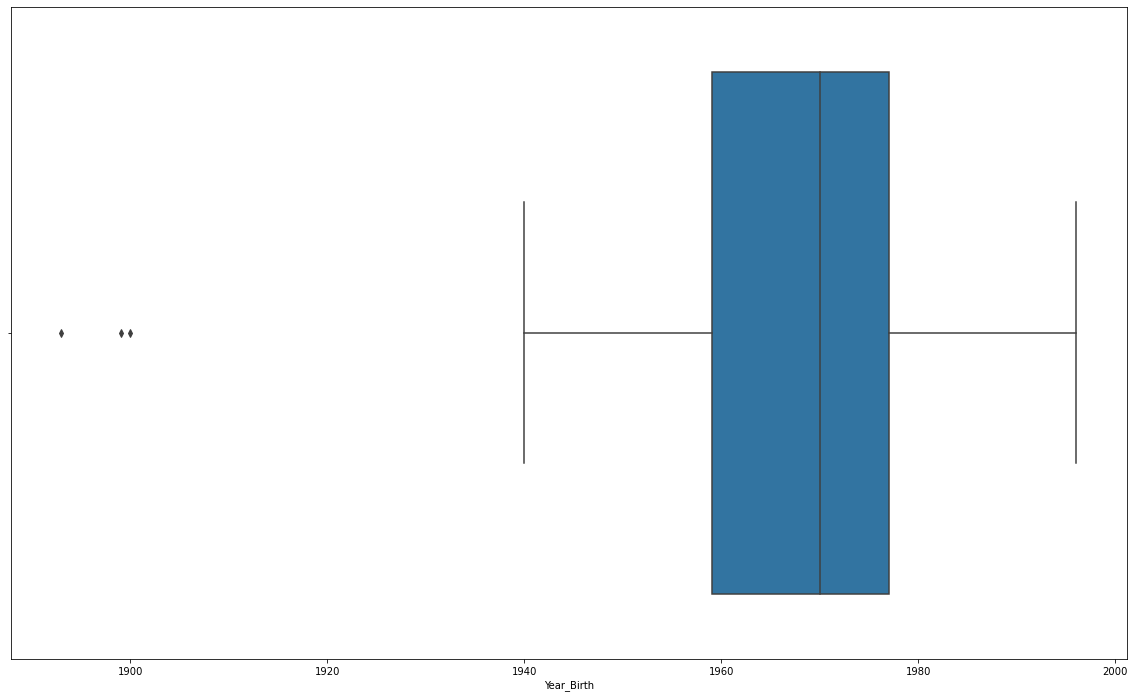

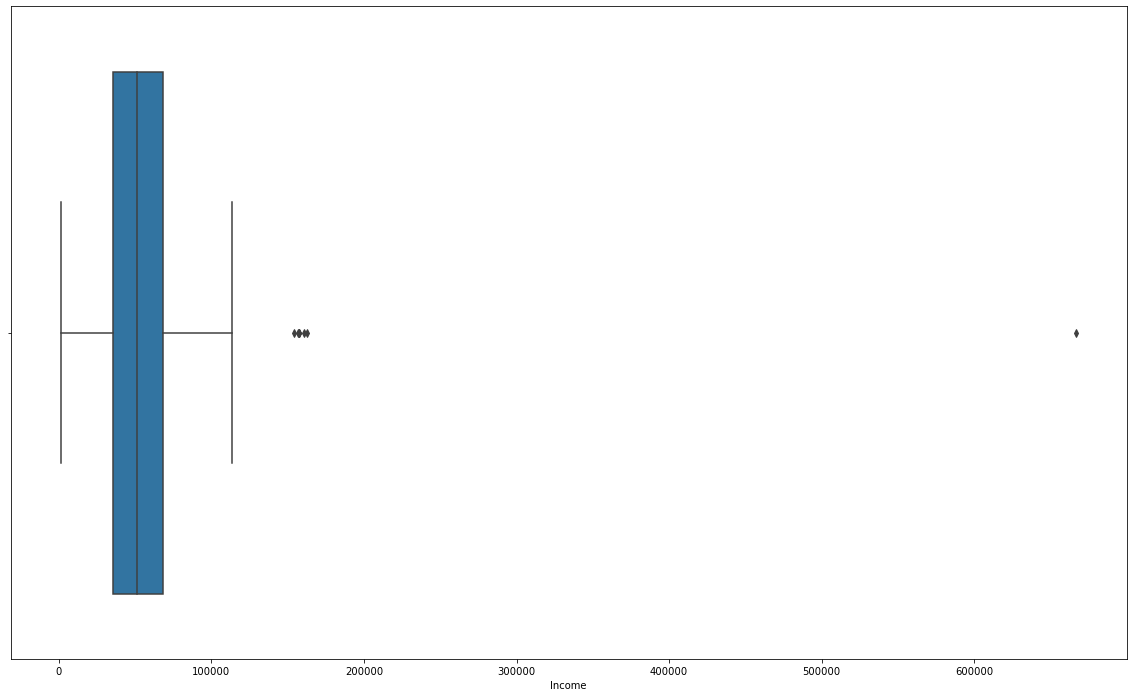

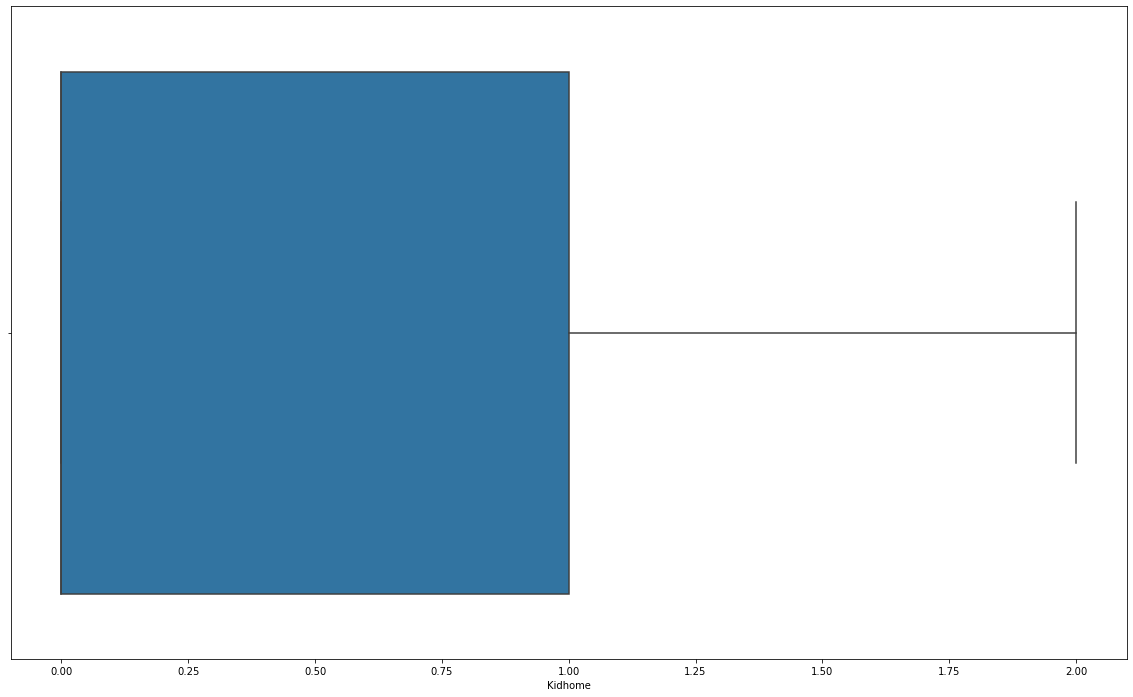

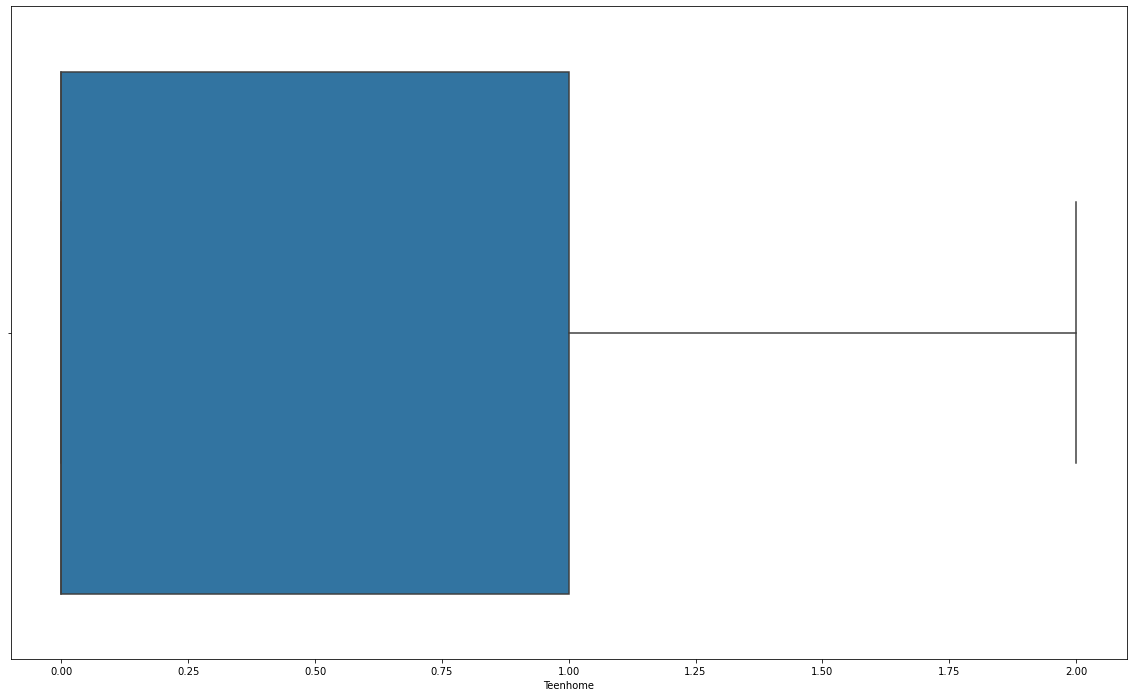

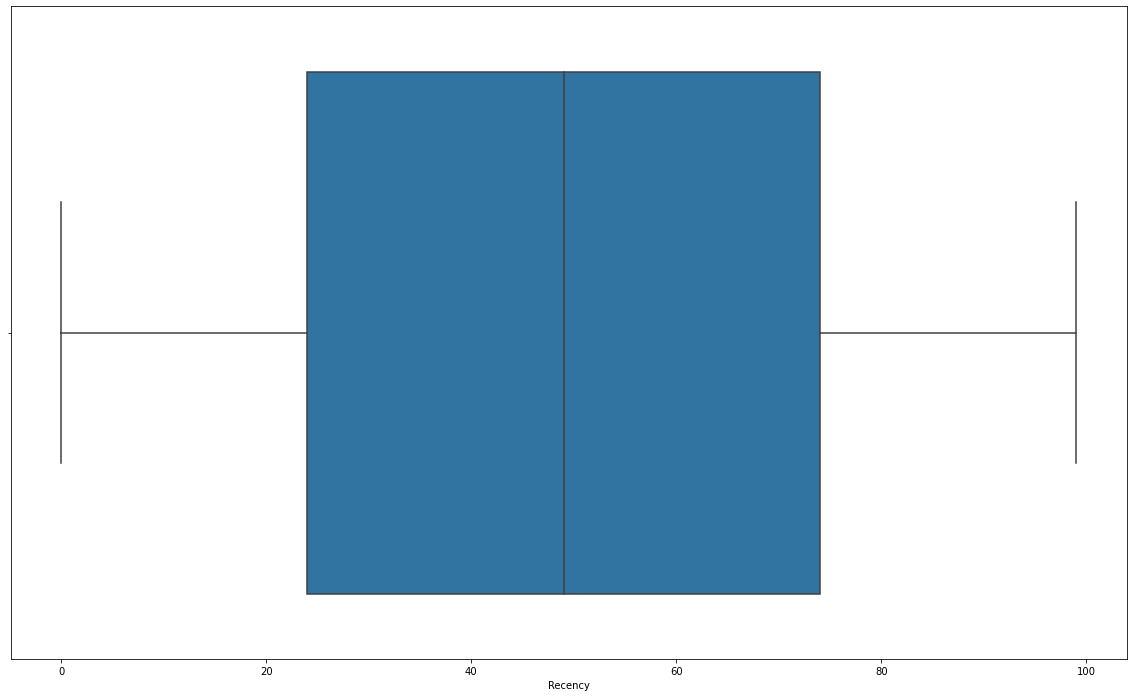

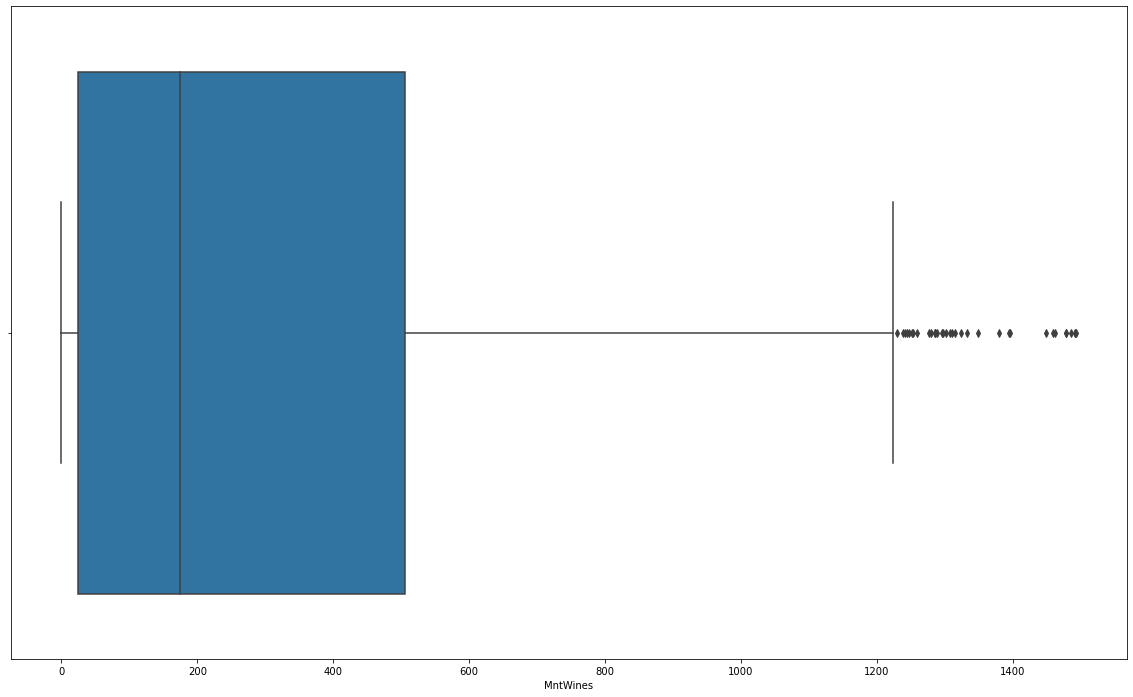

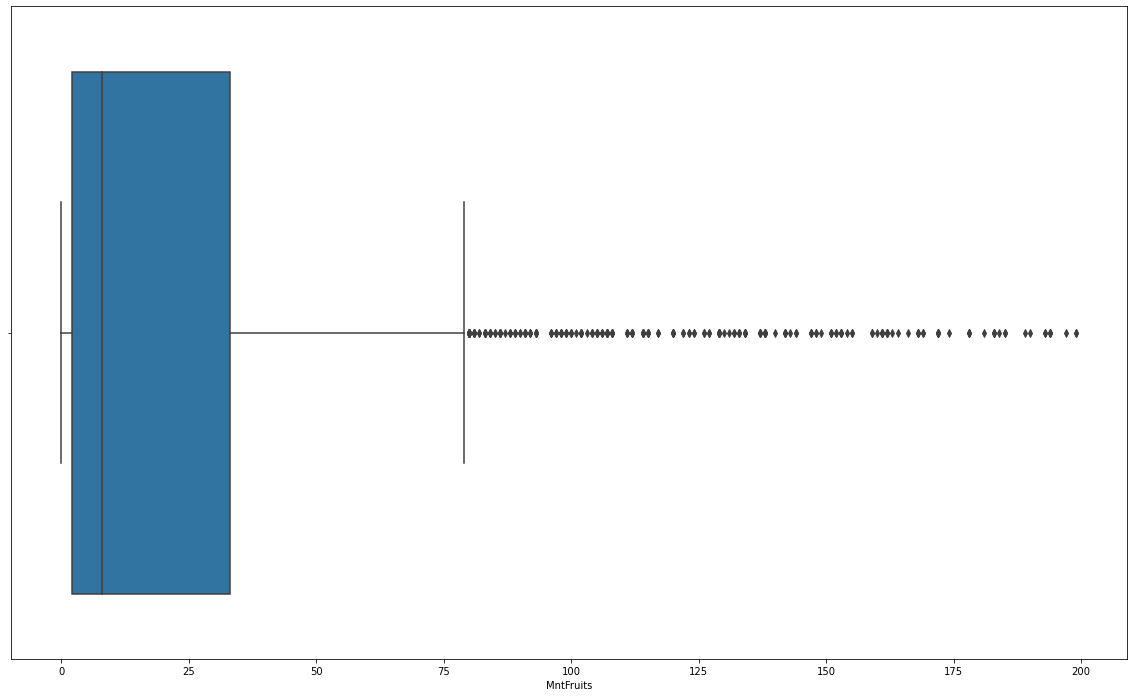

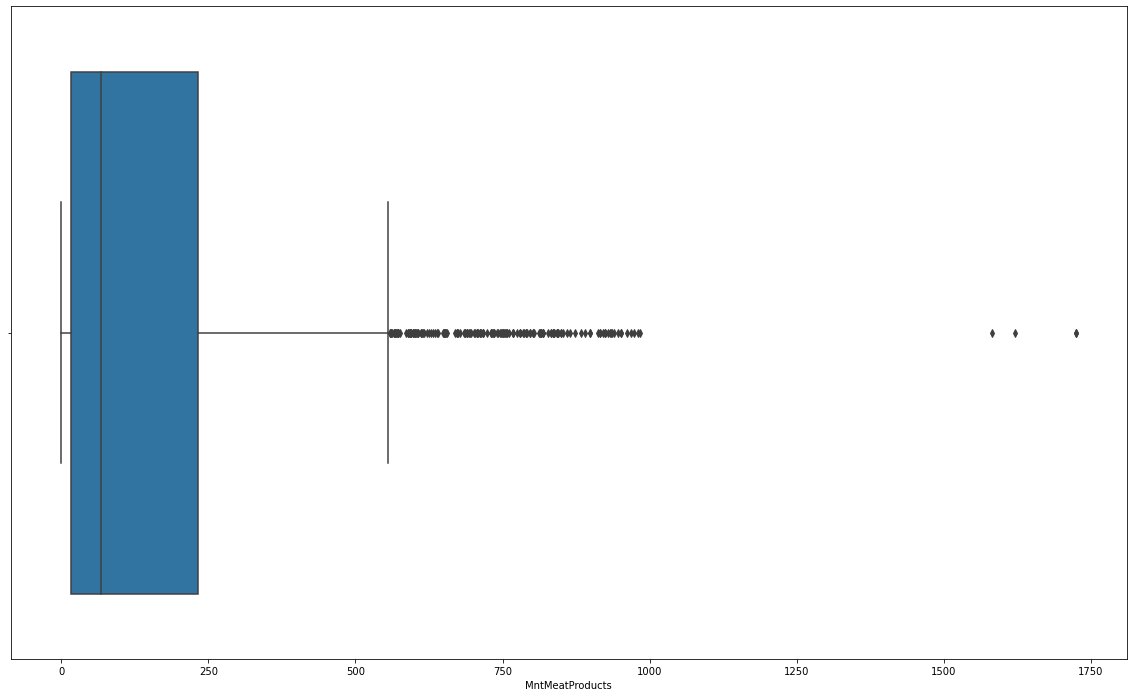

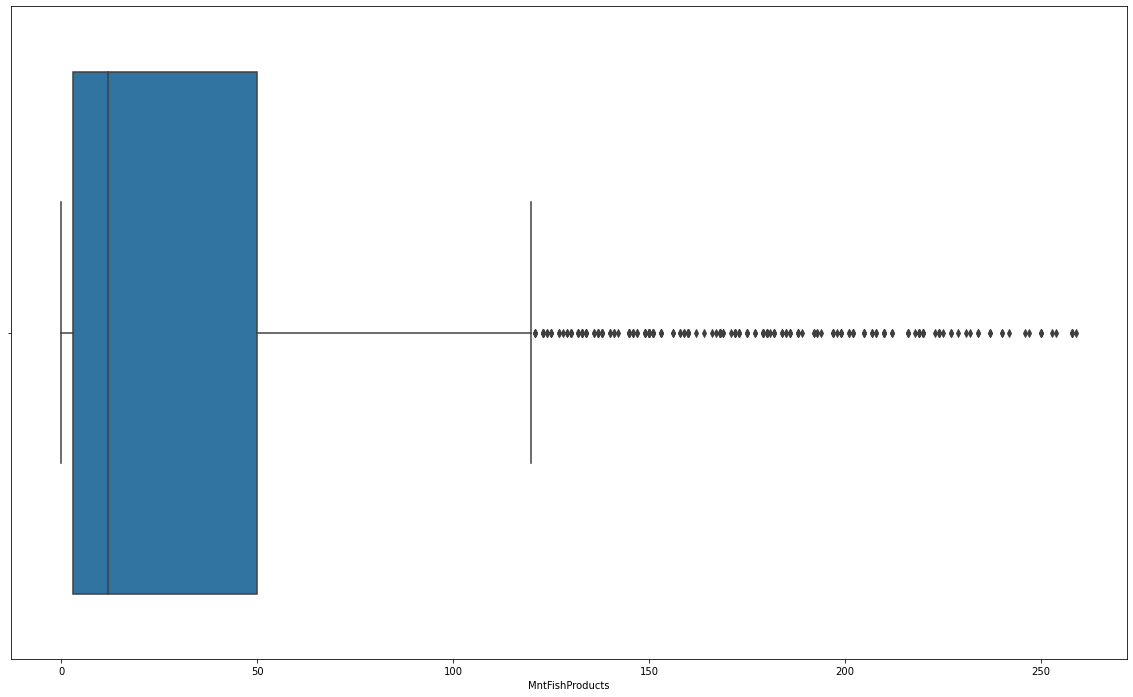

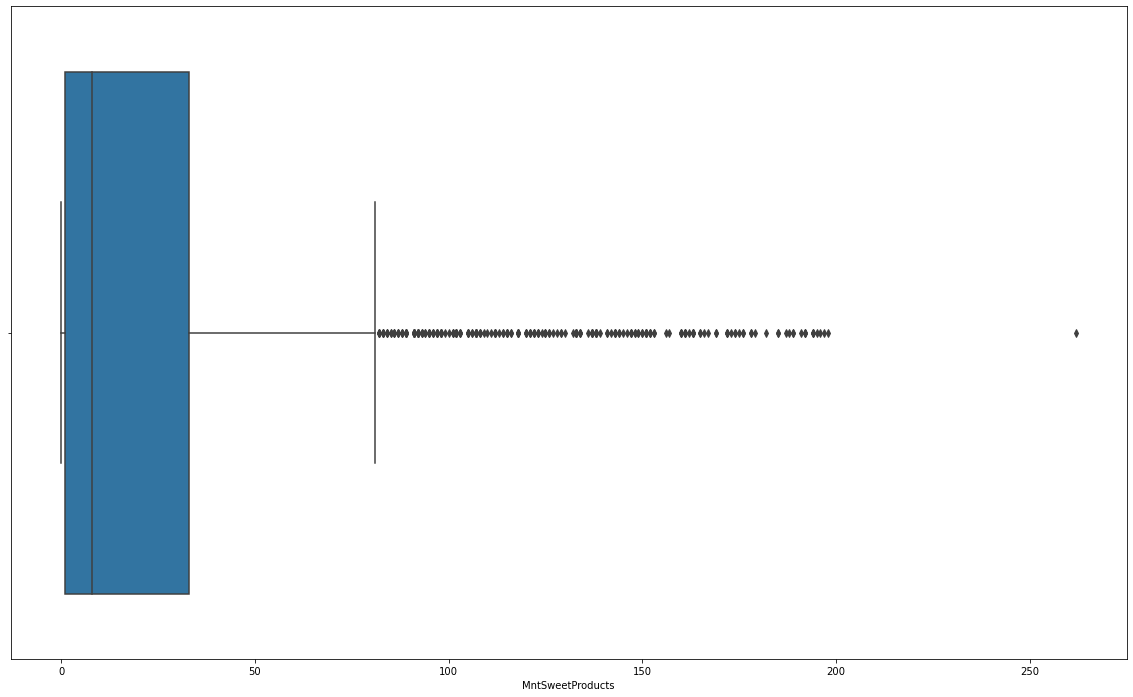

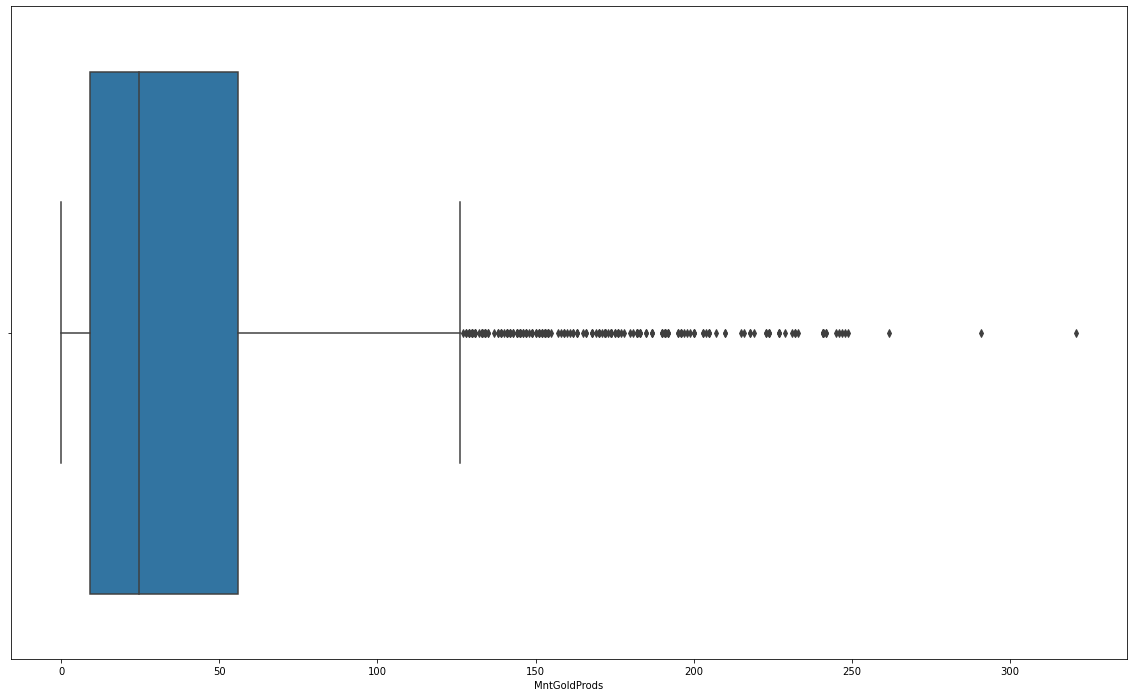

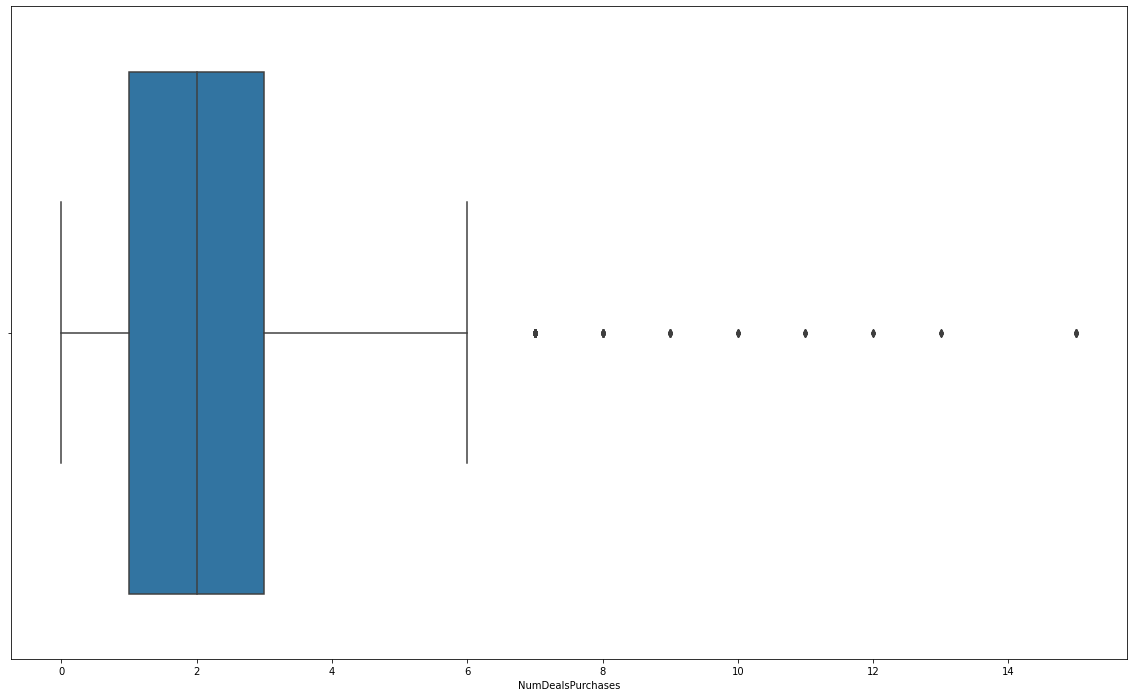

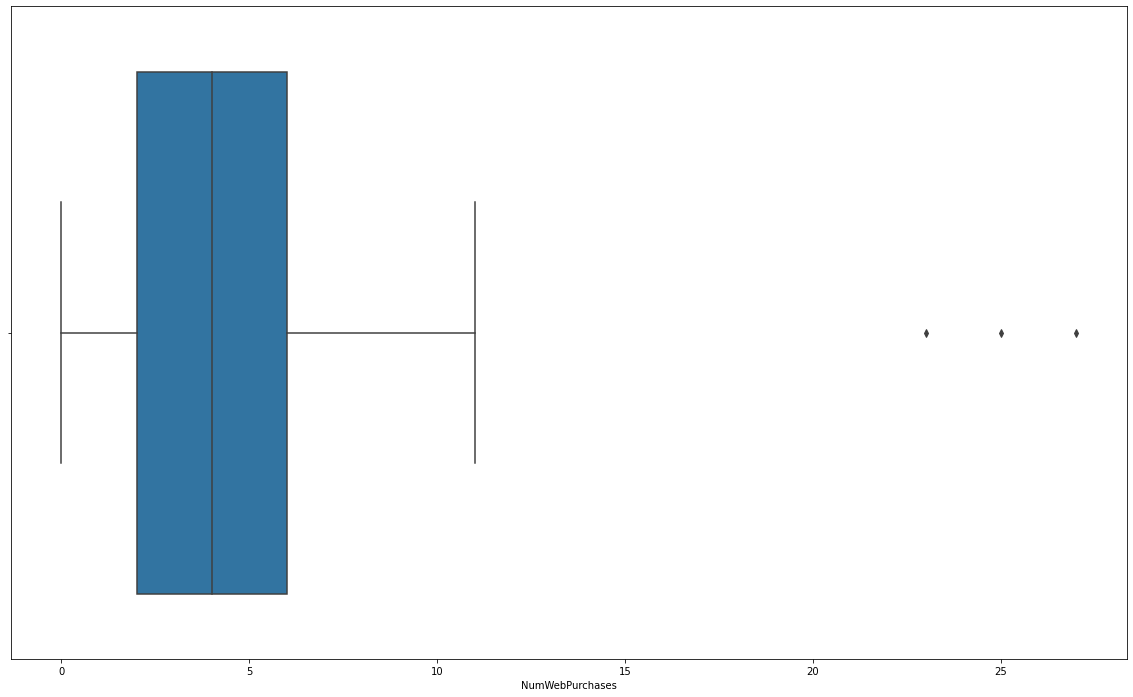

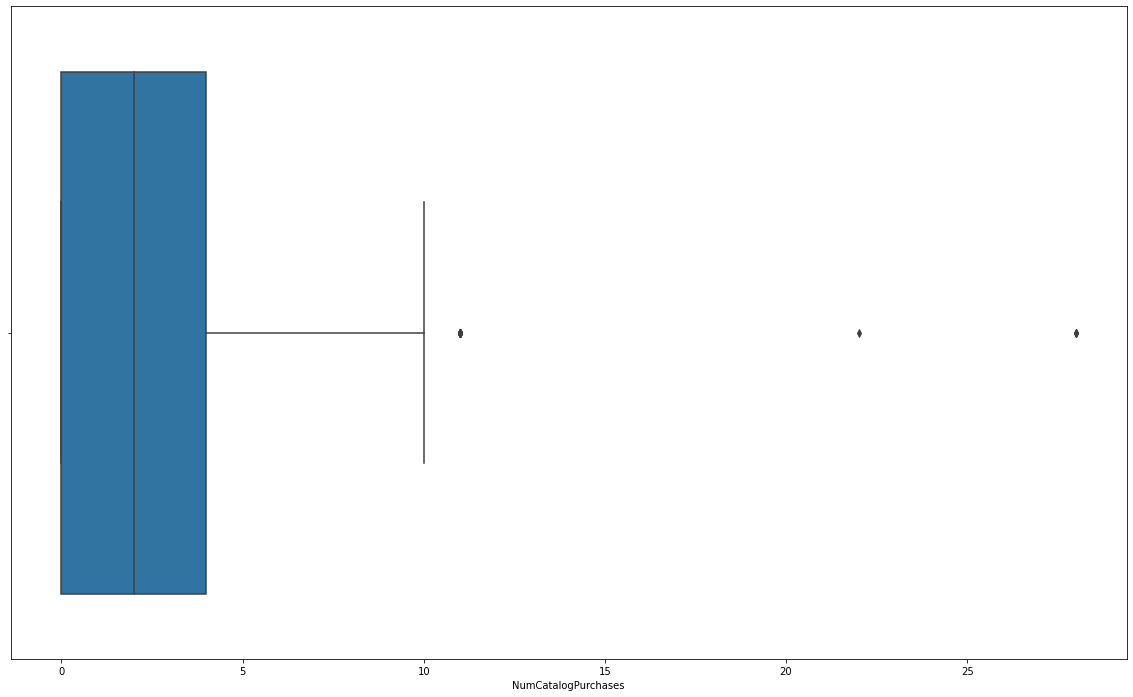

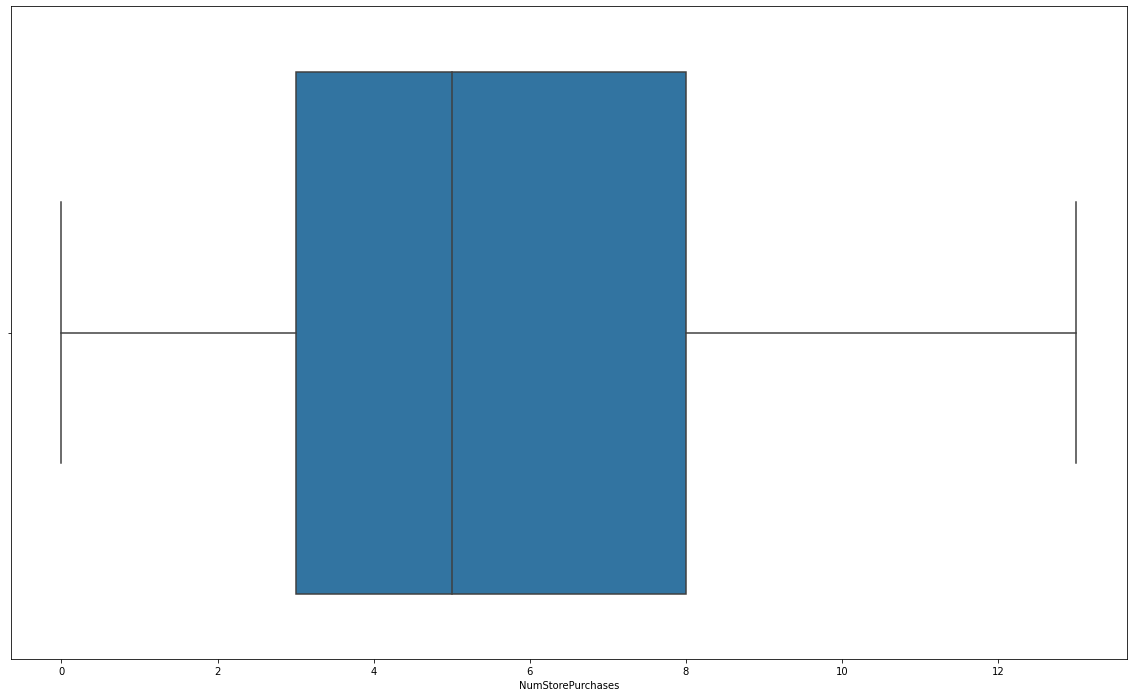

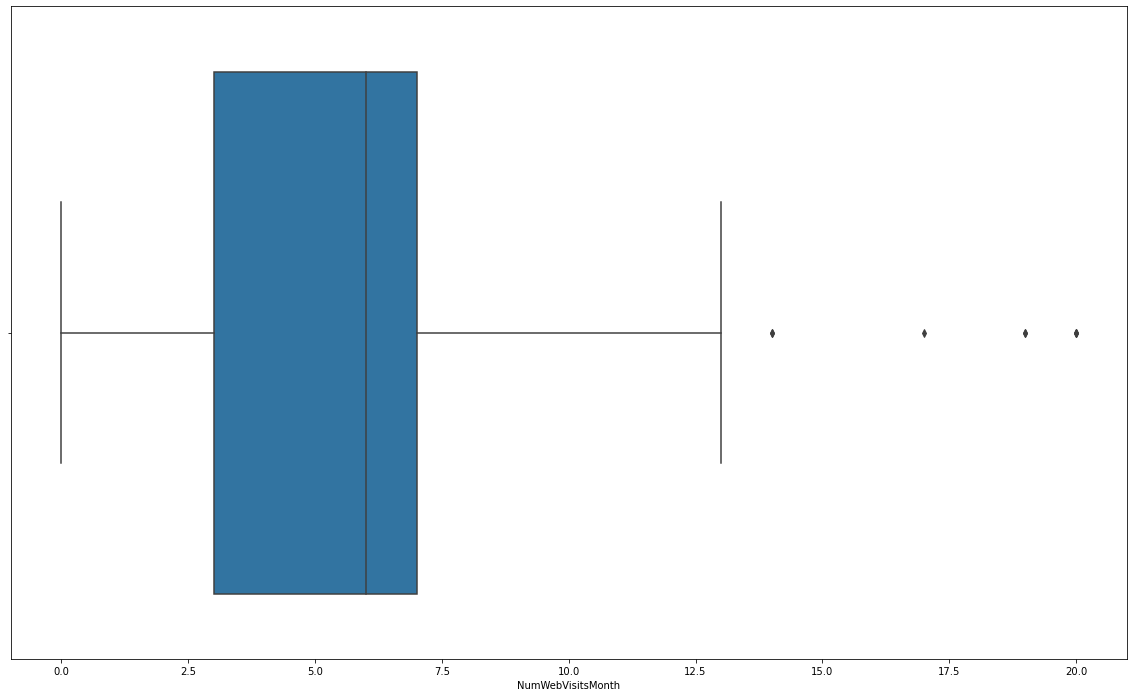

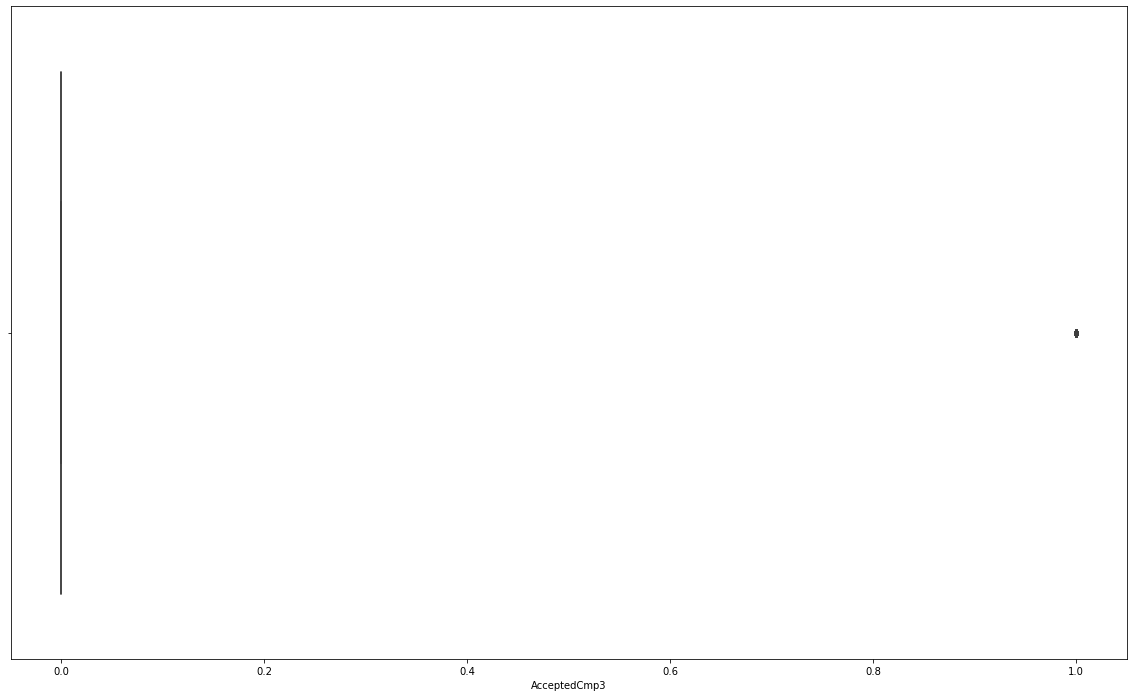

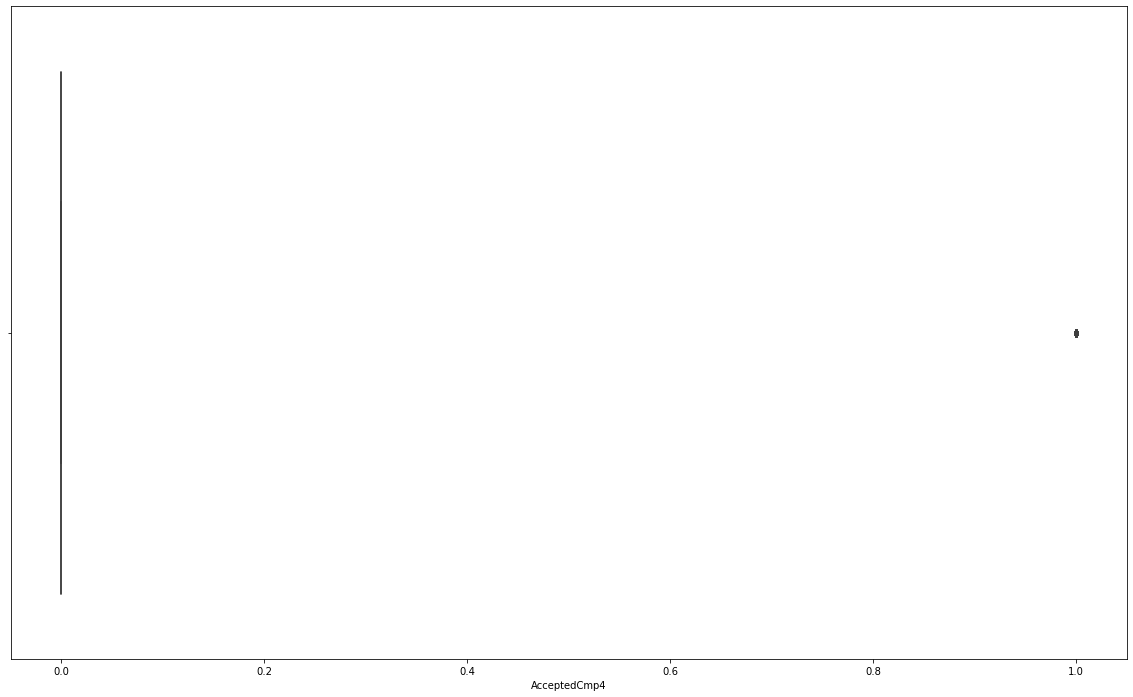

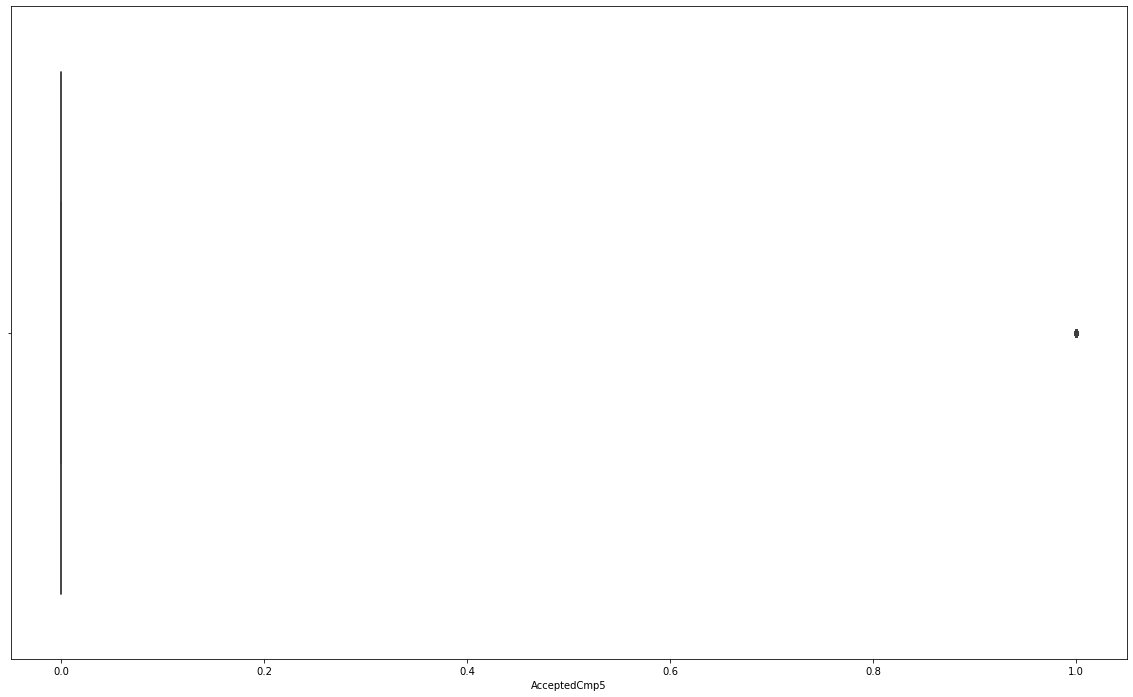

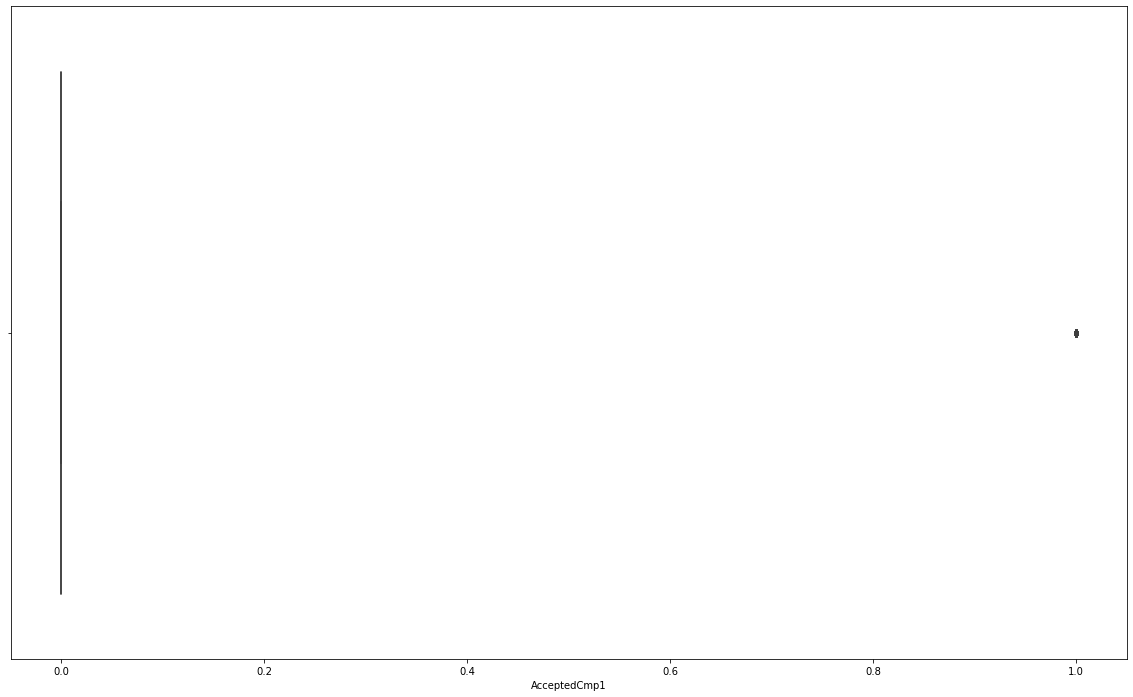

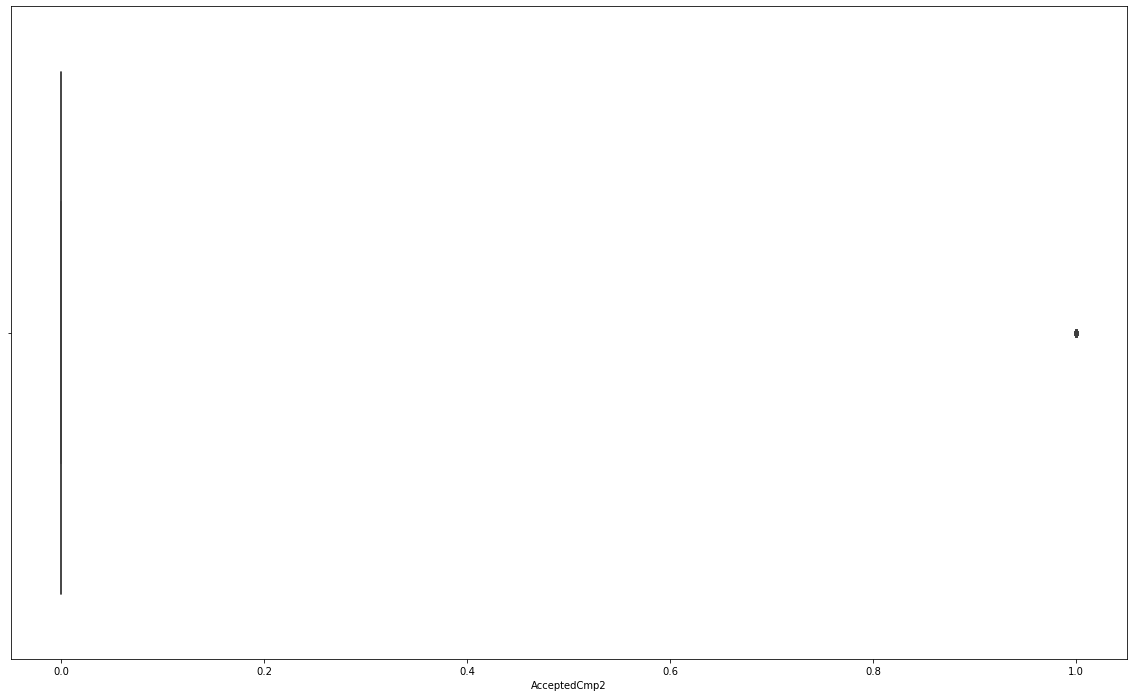

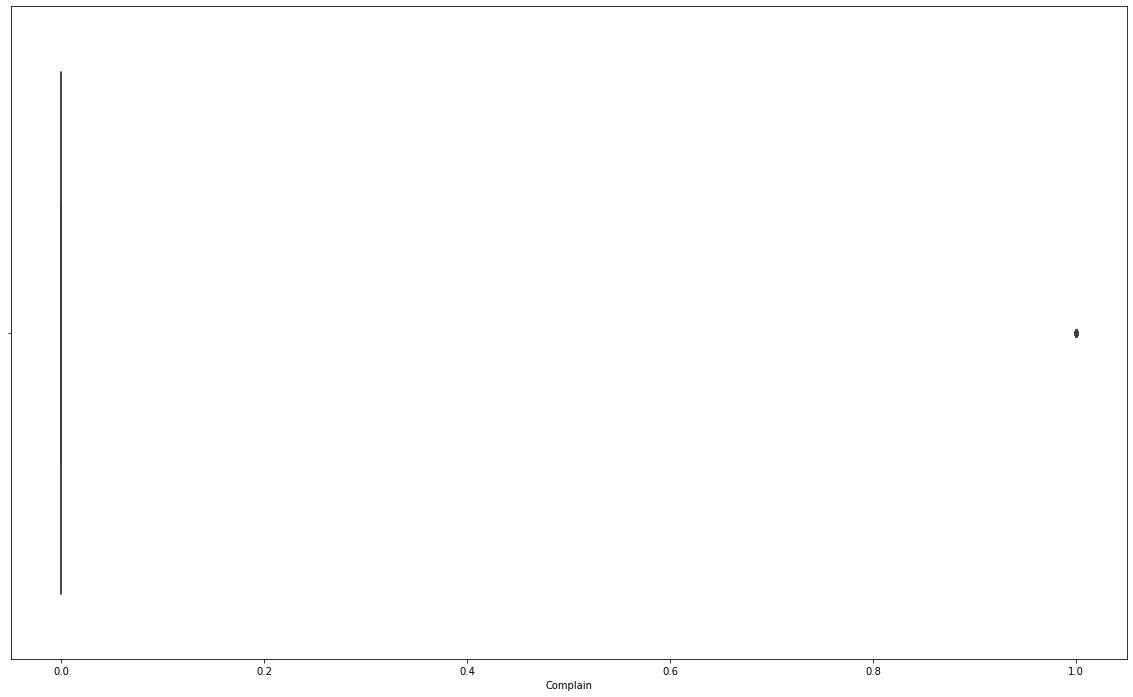

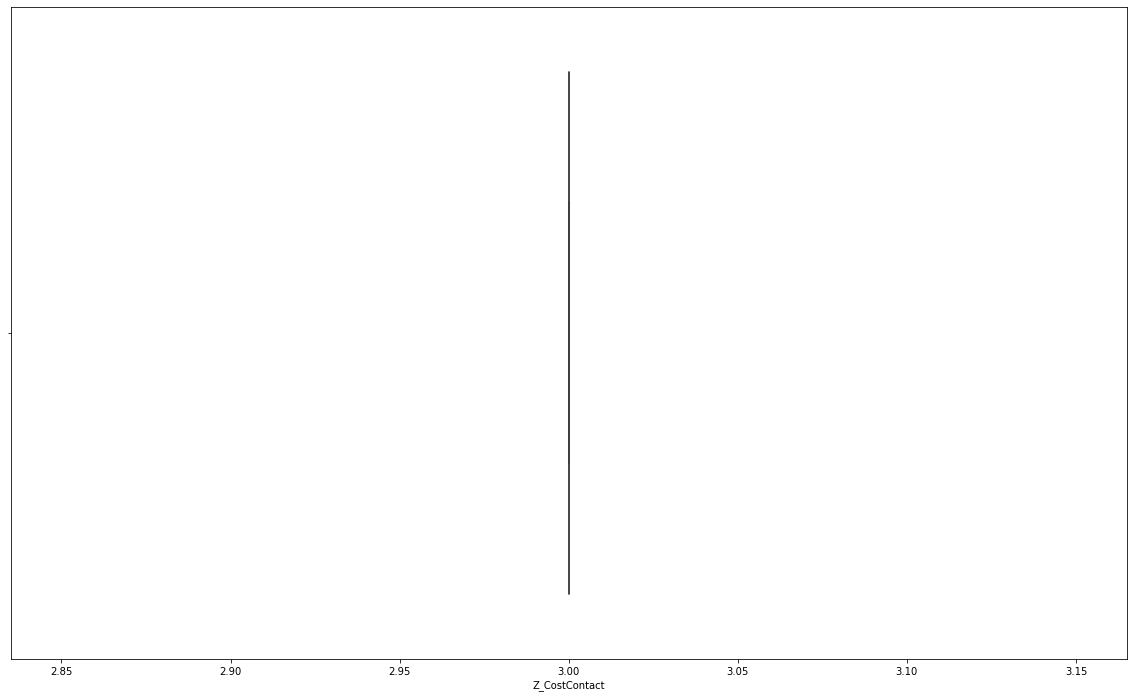

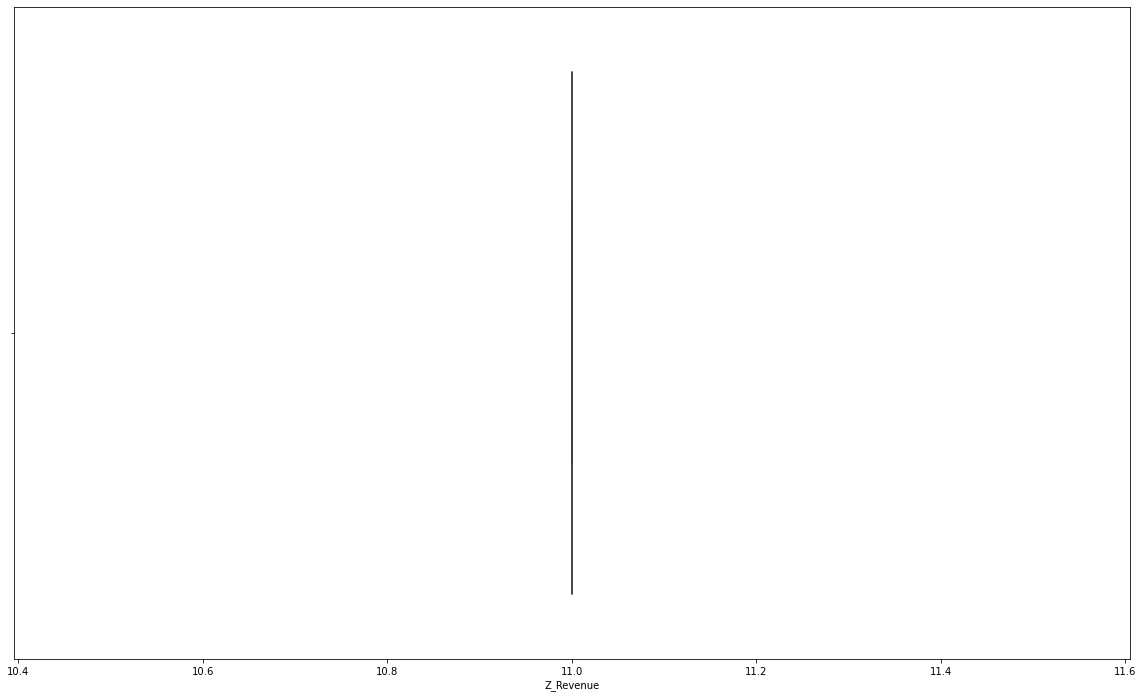

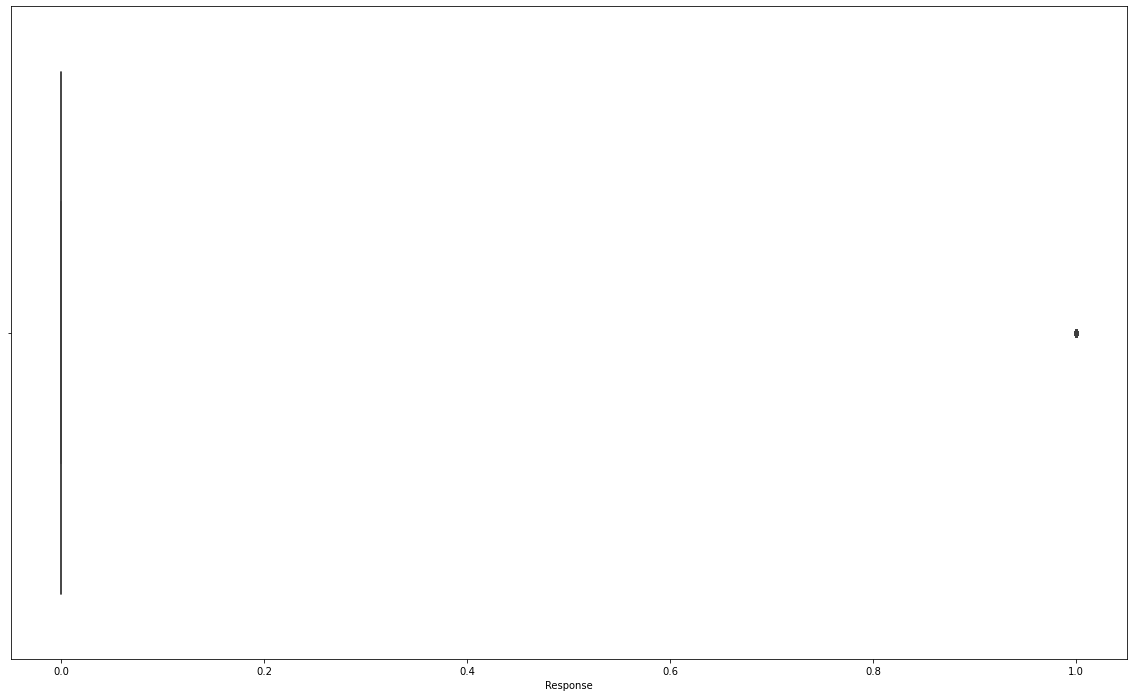

In [ ]:
for col_name in num:    
    plt.figure(figsize=(20,12))
    sns.boxplot(data=df, x=col_name, hue='Response')

C:\Users\Aditya Rizaldi\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


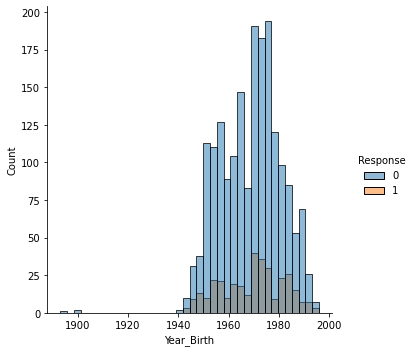

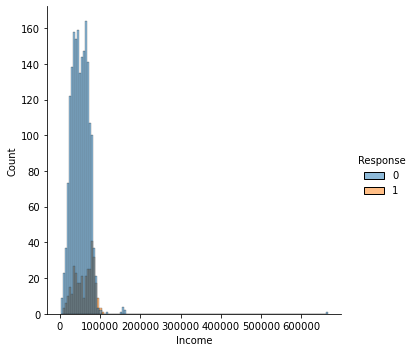

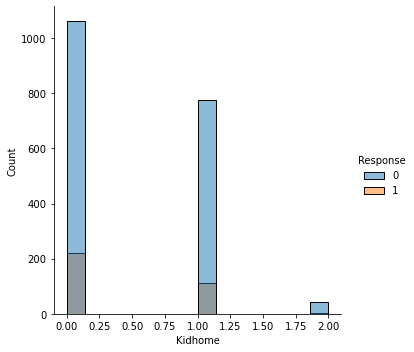

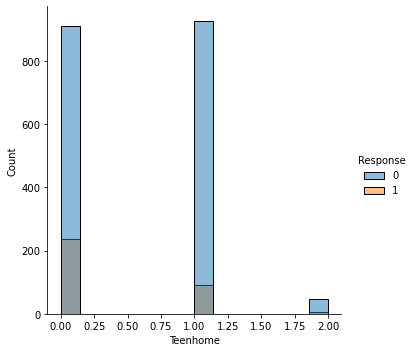

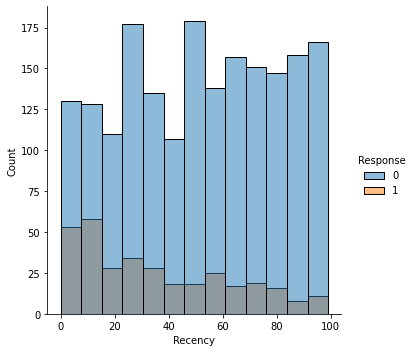

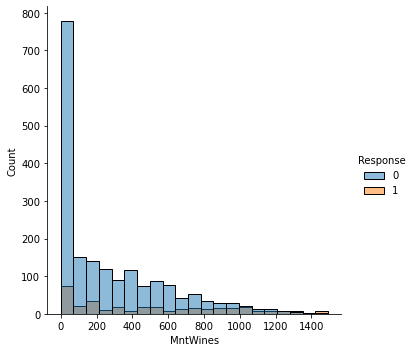

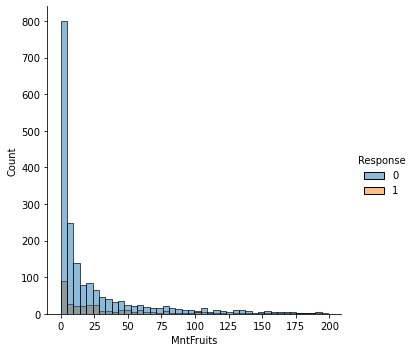

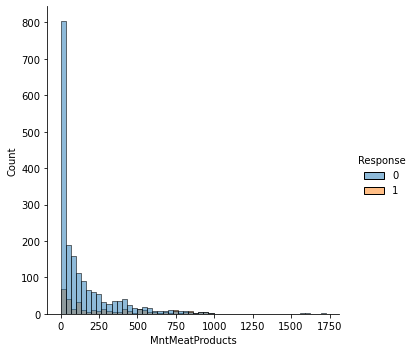

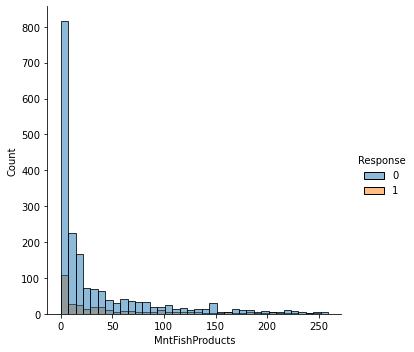

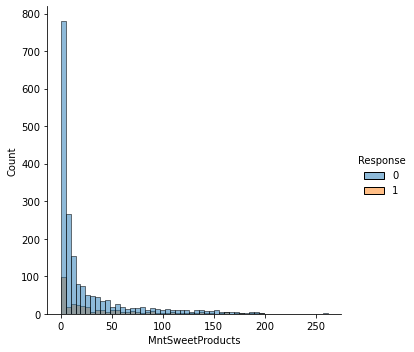

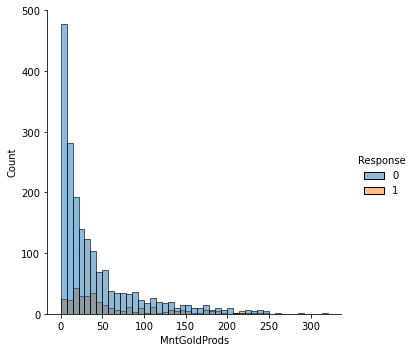

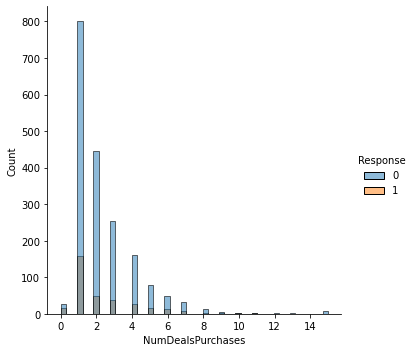

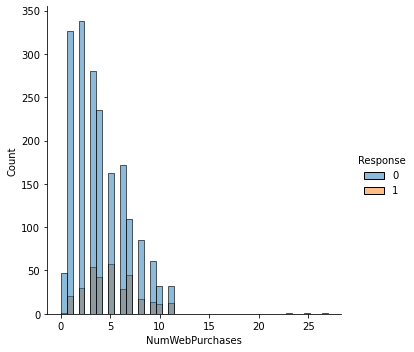

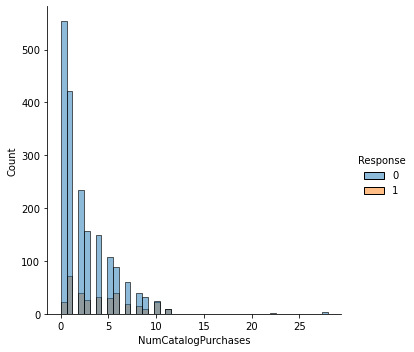

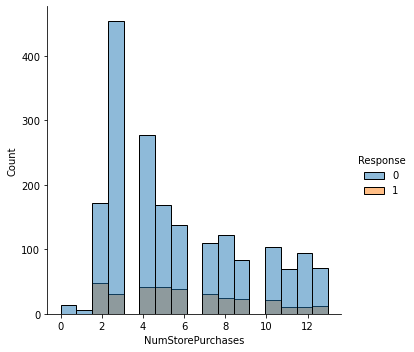

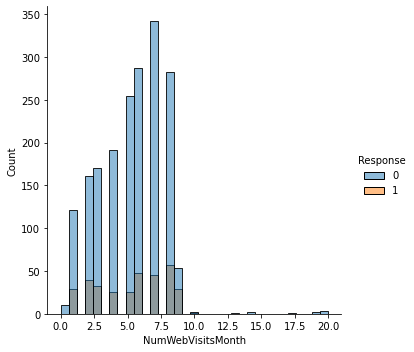

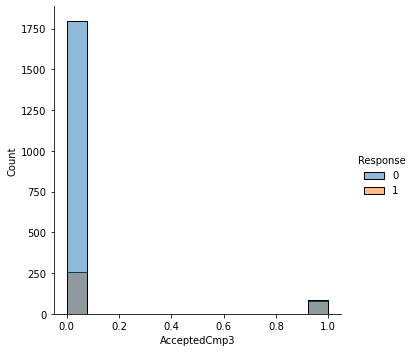

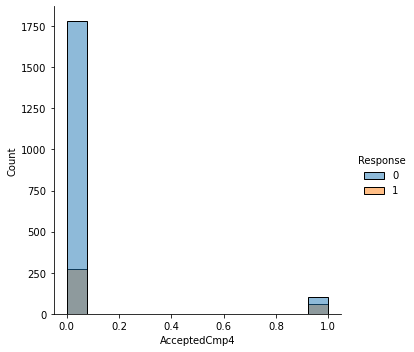

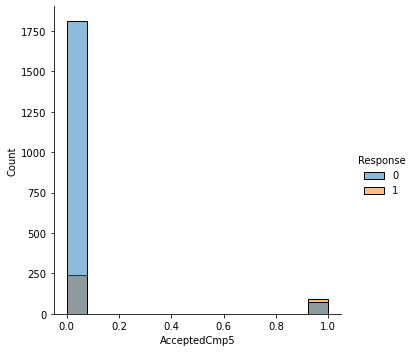

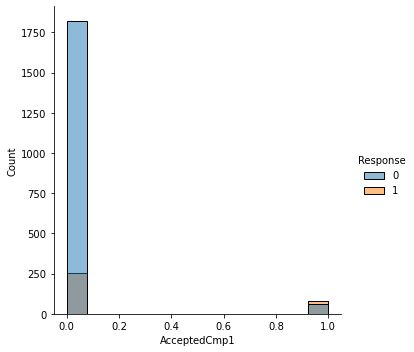

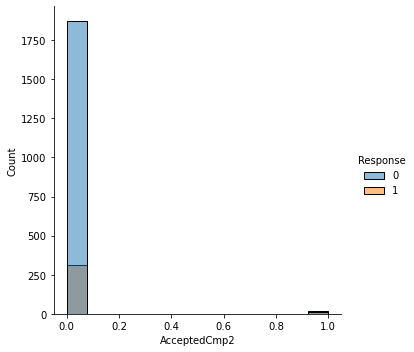

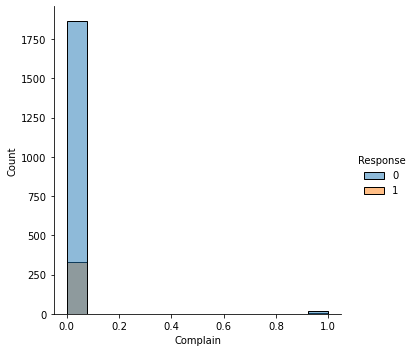

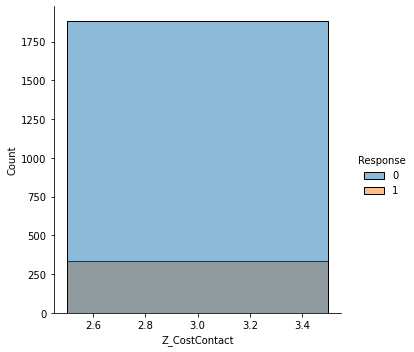

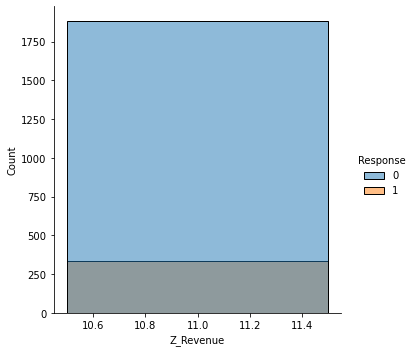

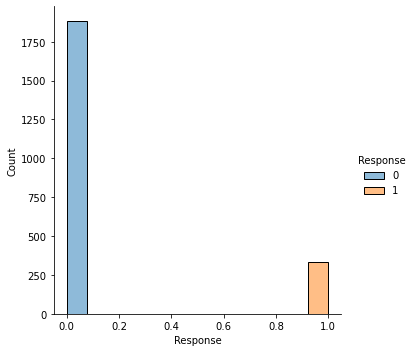

In [ ]:
for col_name in num:
    sns.displot(data=df, x=col_name, hue='Response')

In [ ]:
num = df.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

<AxesSubplot:>

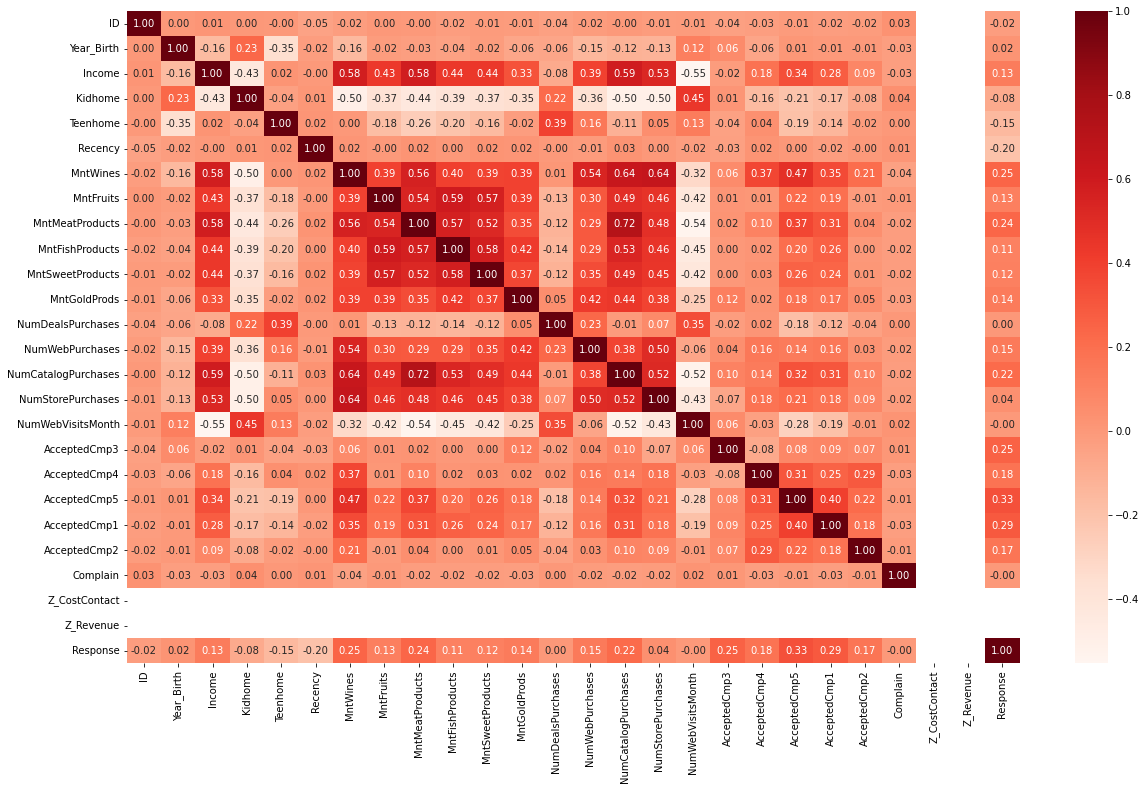

In [ ]:
#corelation heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="Reds", annot=True, fmt=".2f")

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_17236/3986923026.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,12))


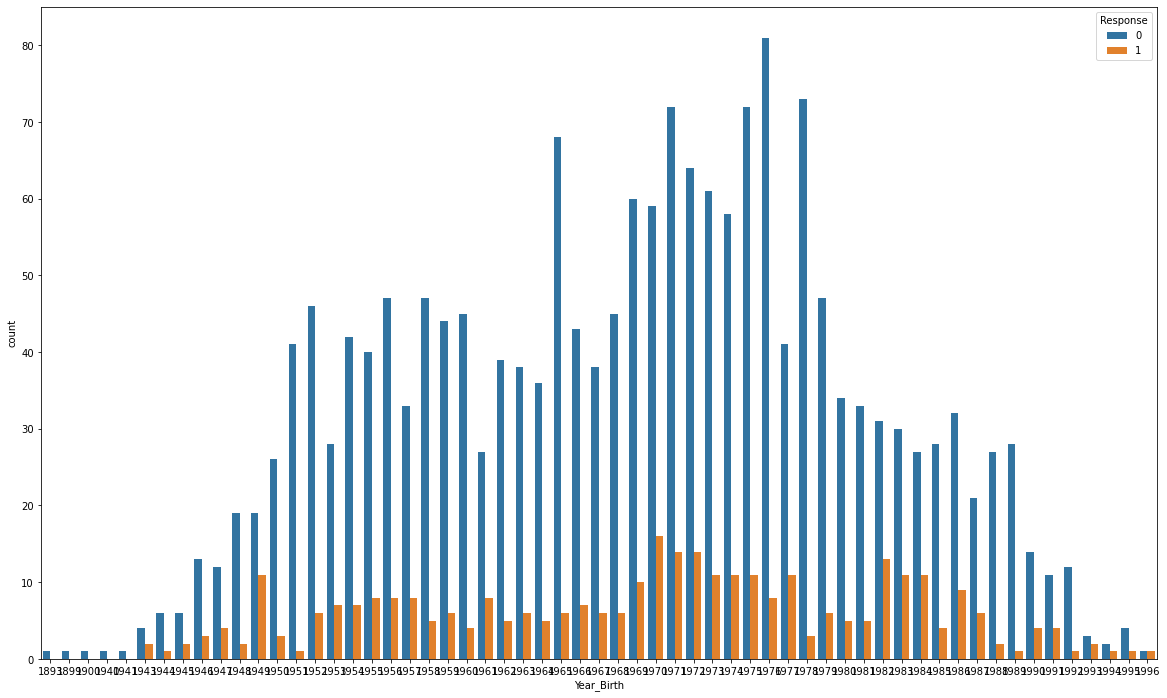

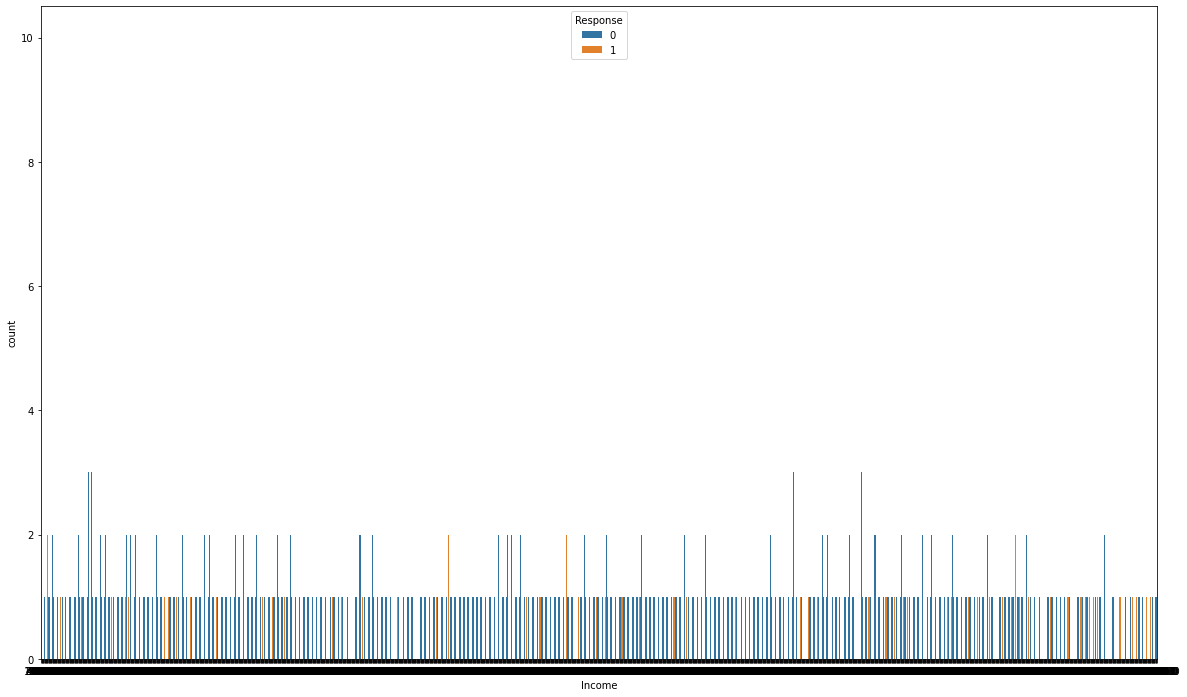

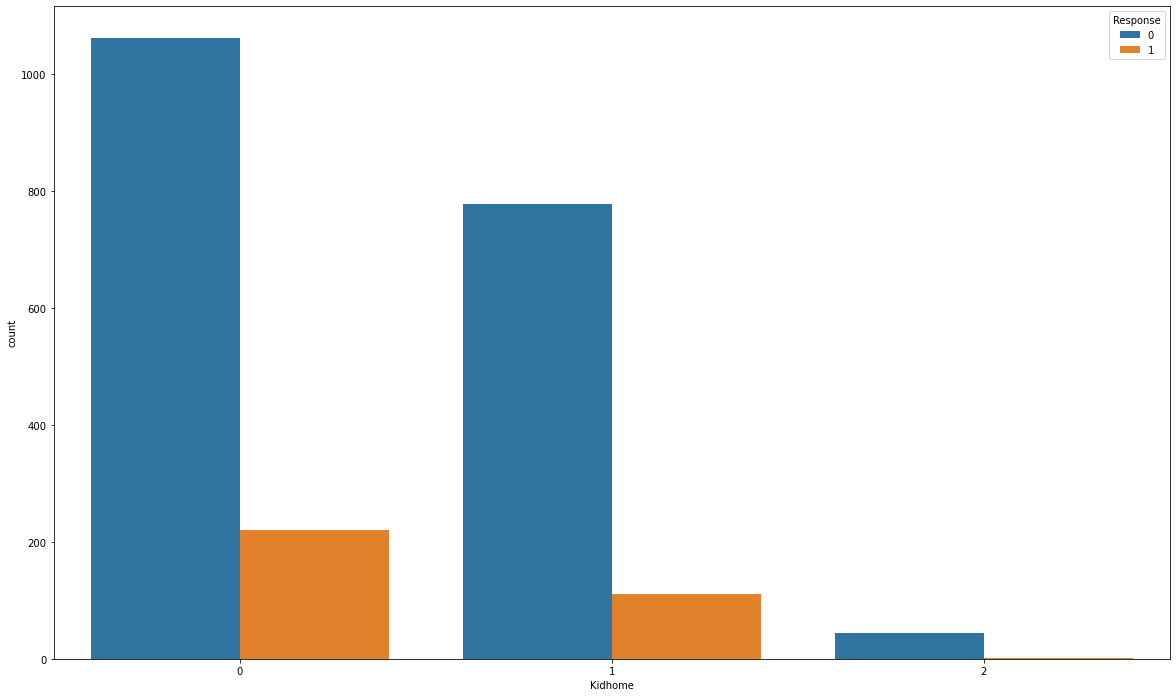

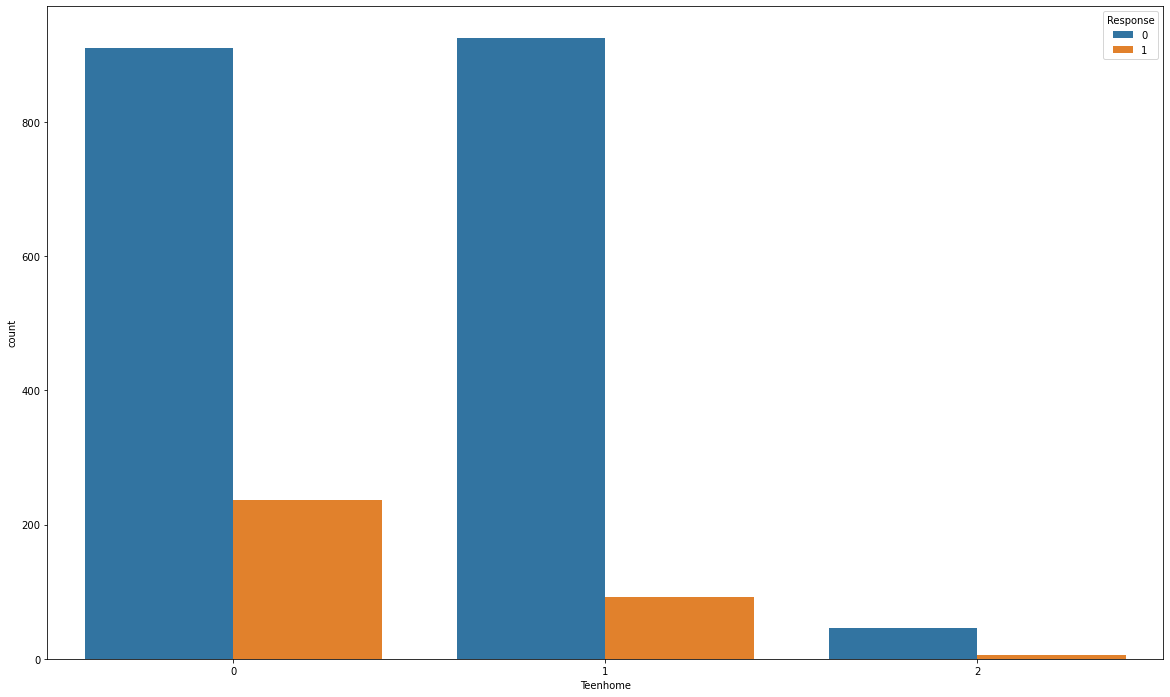

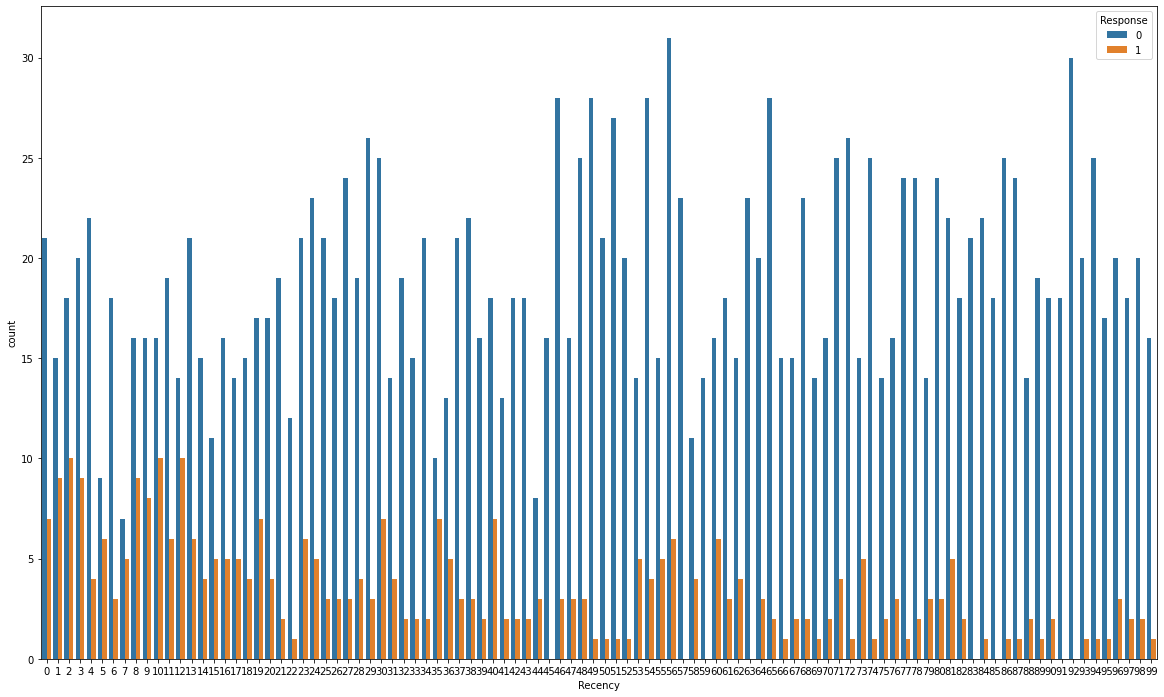

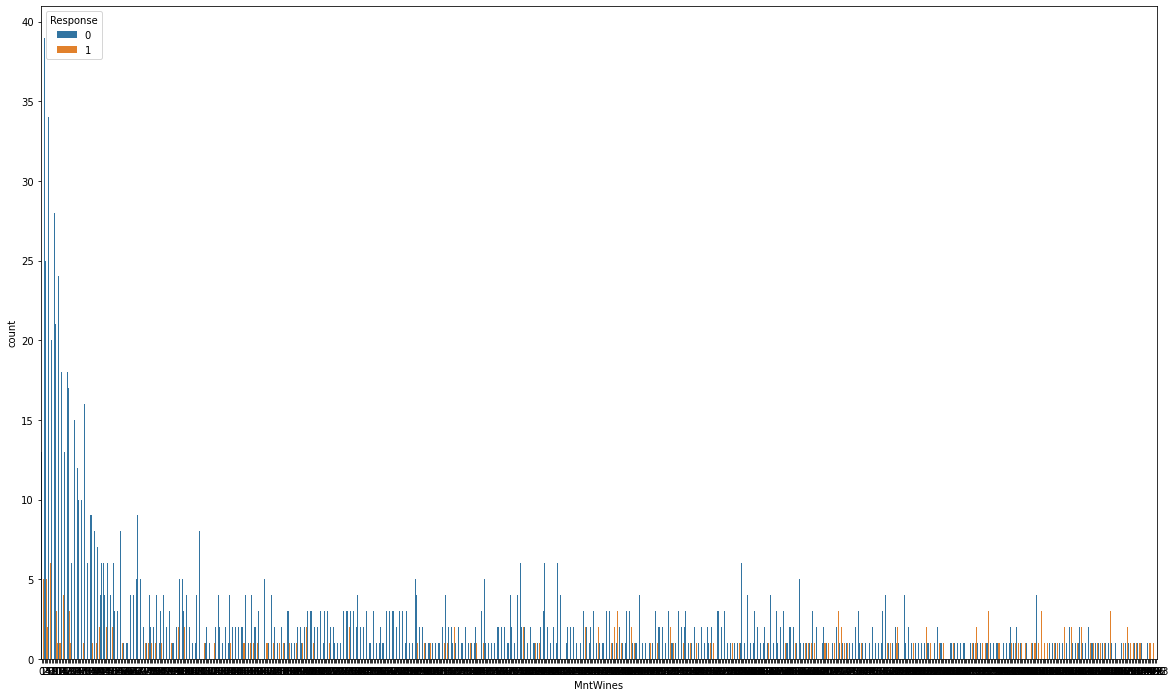

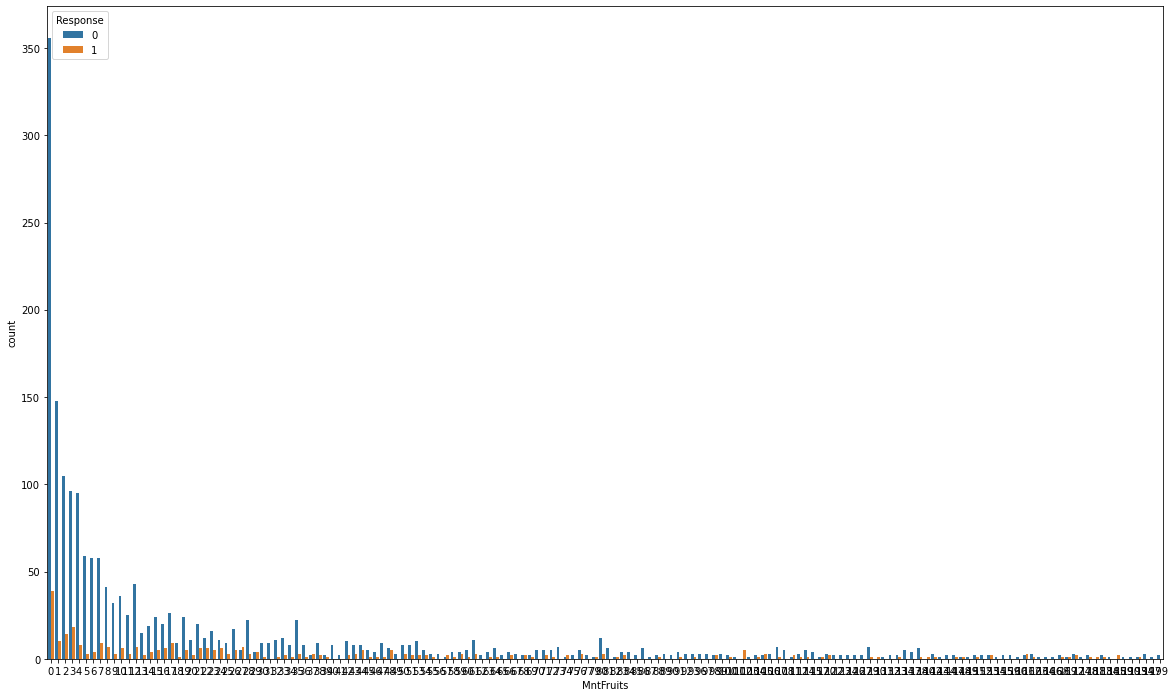

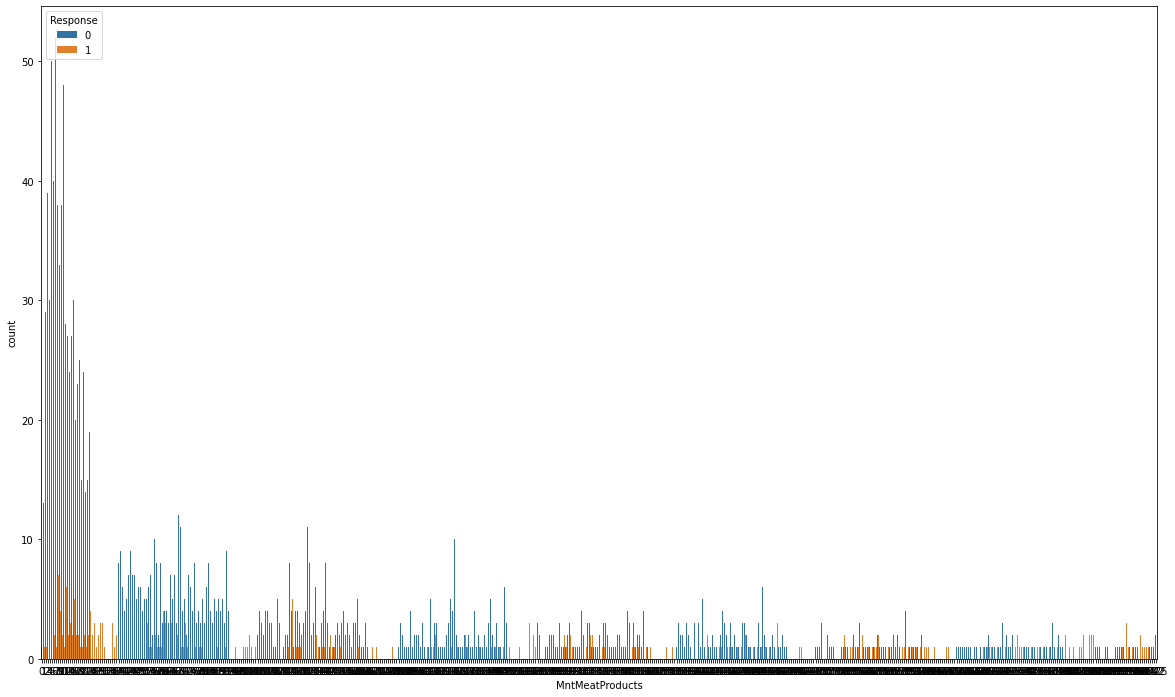

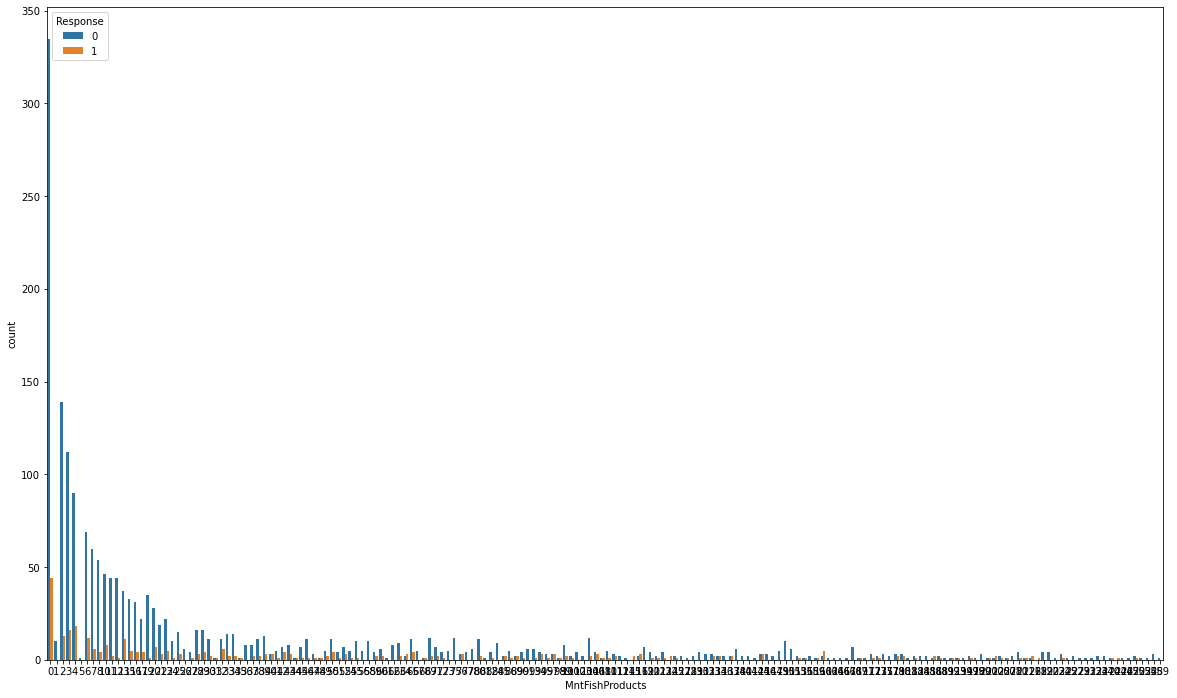

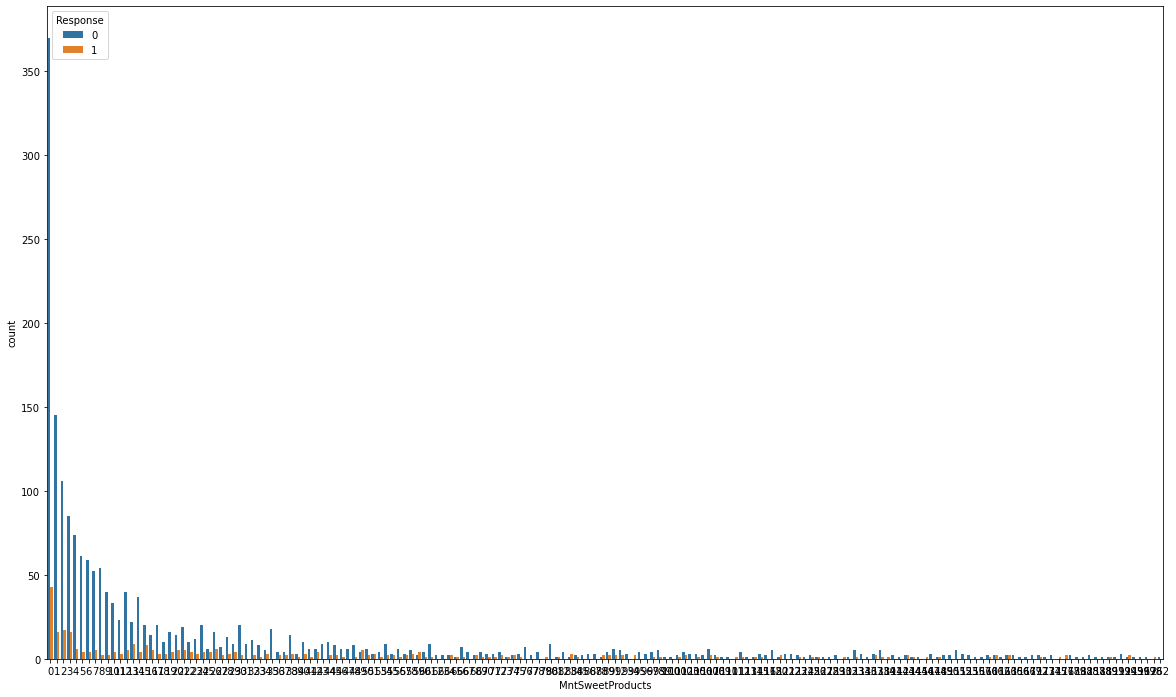

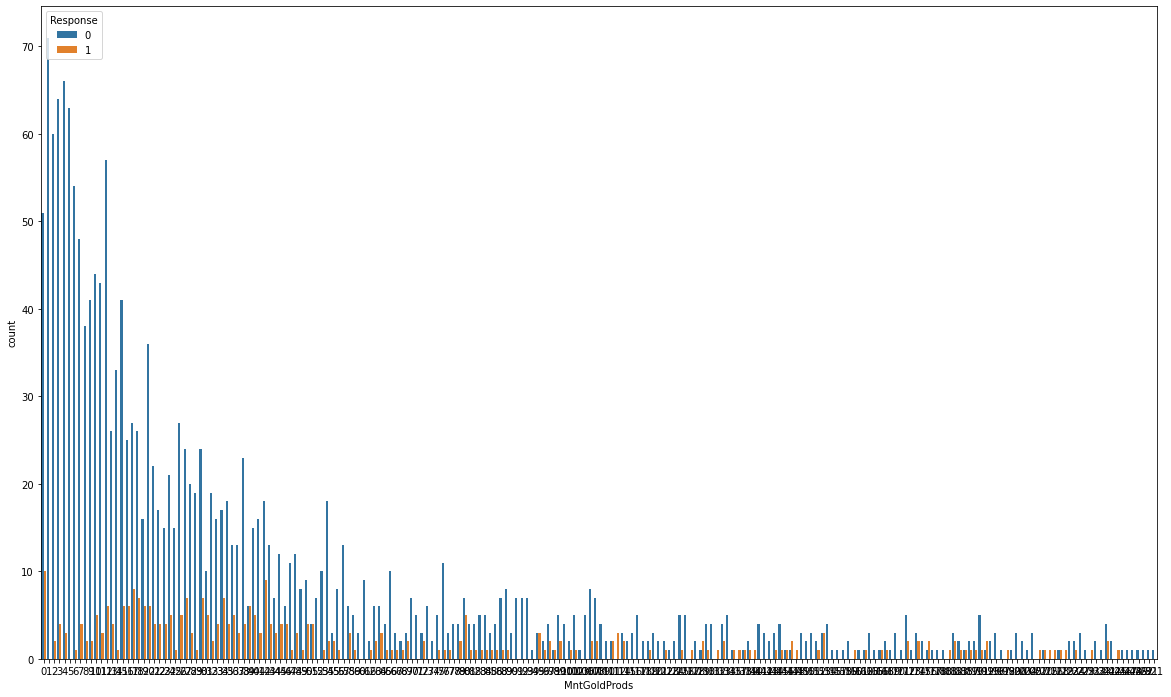

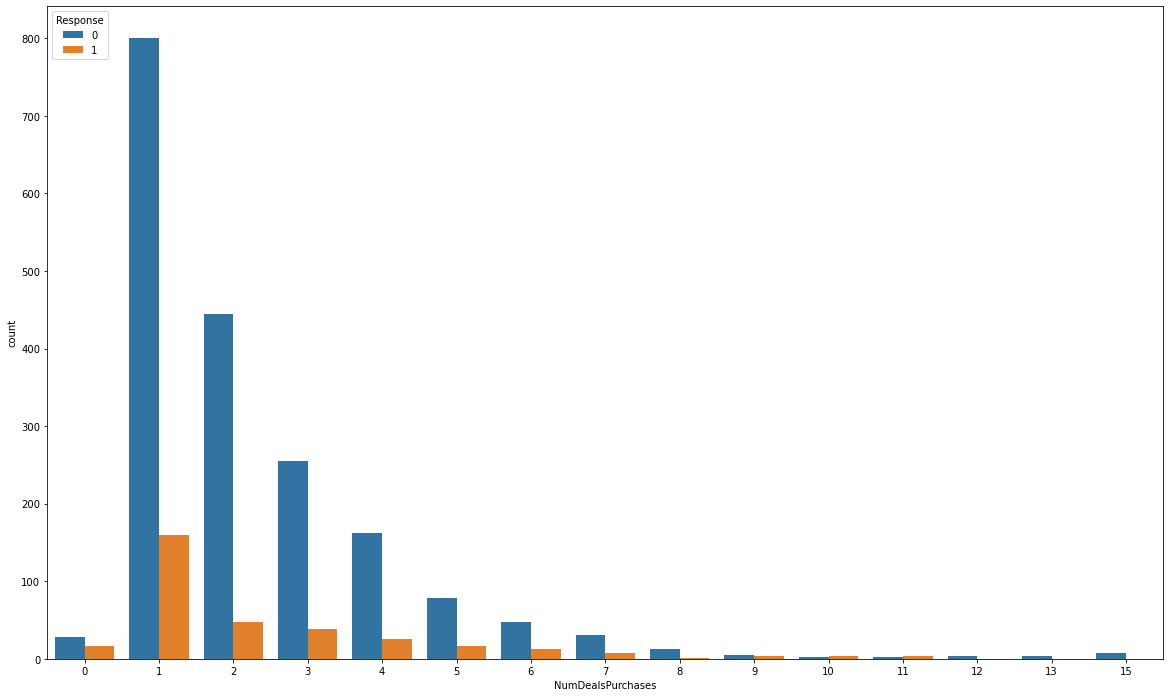

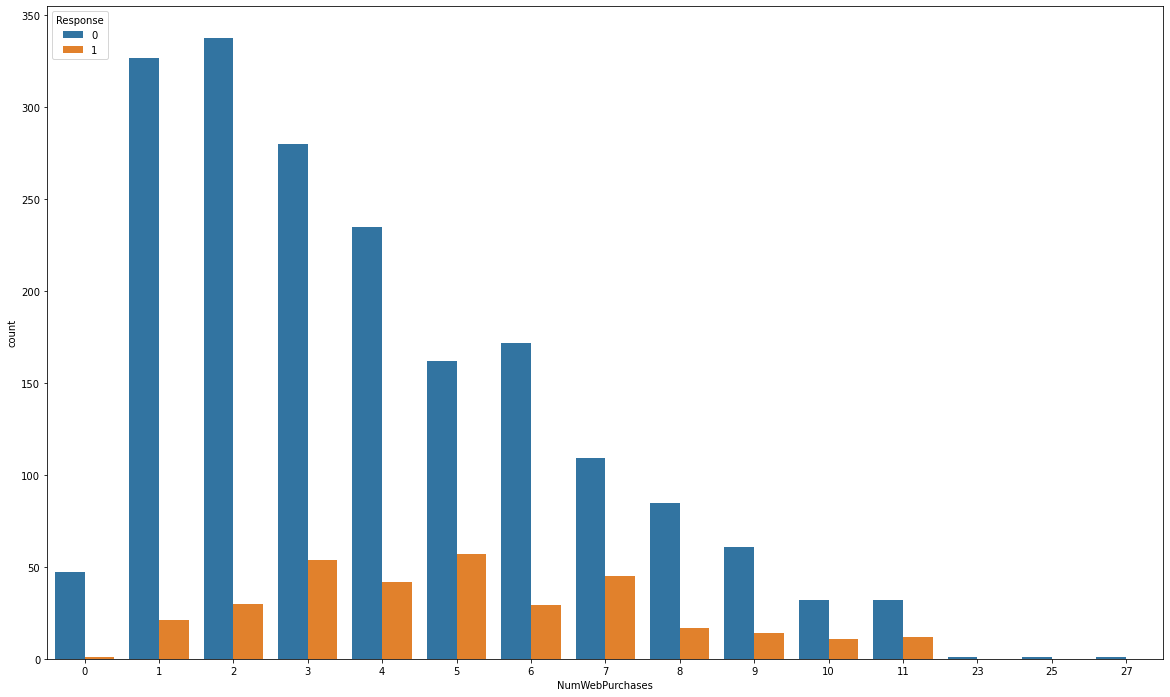

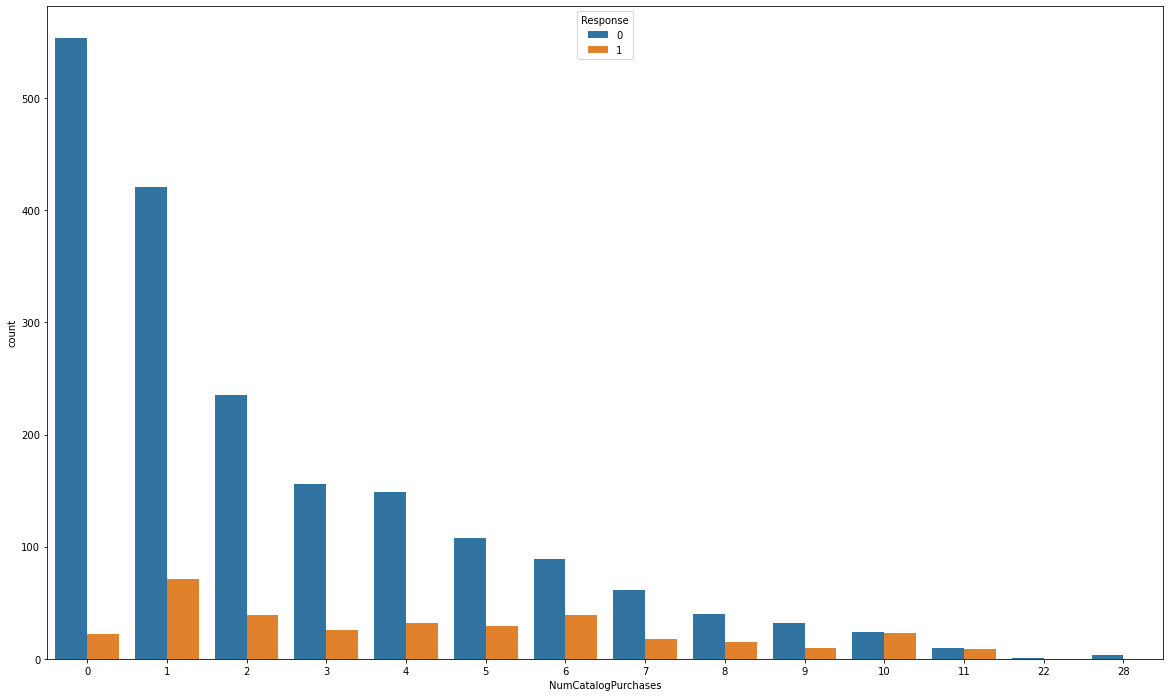

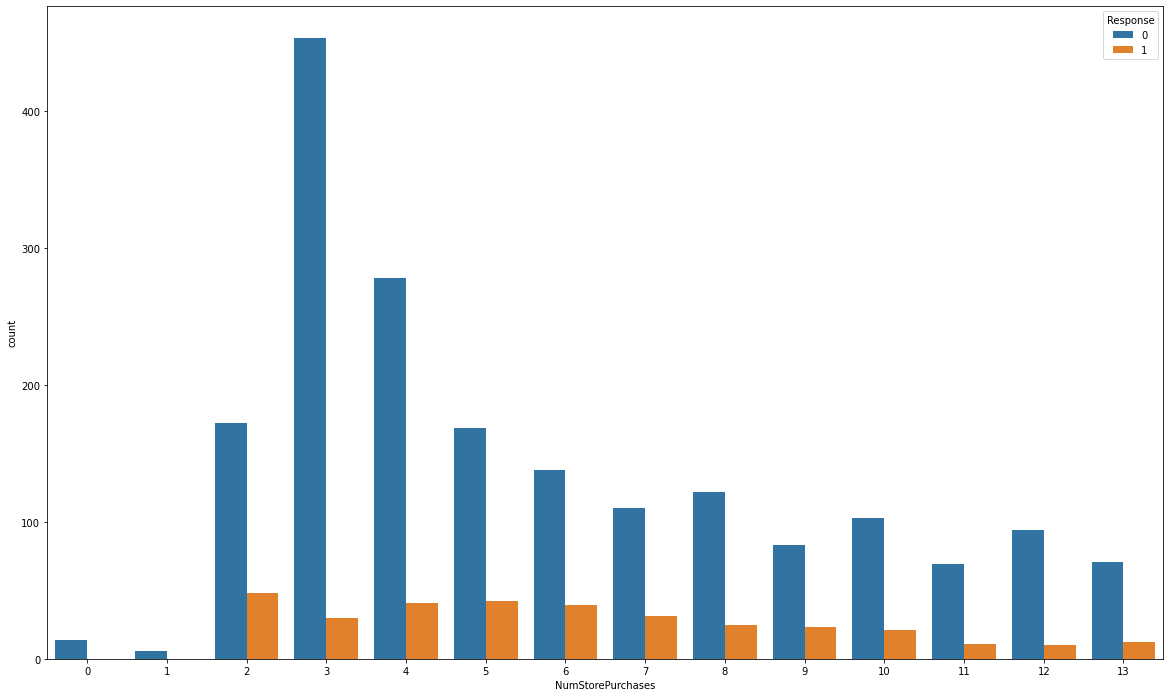

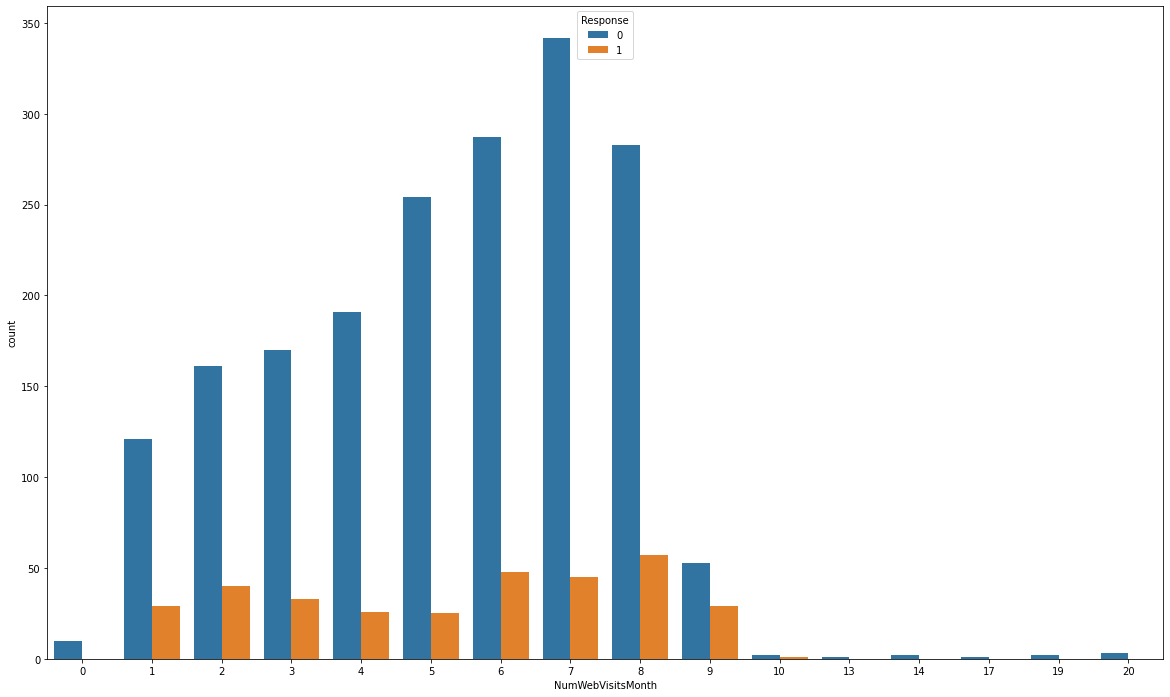

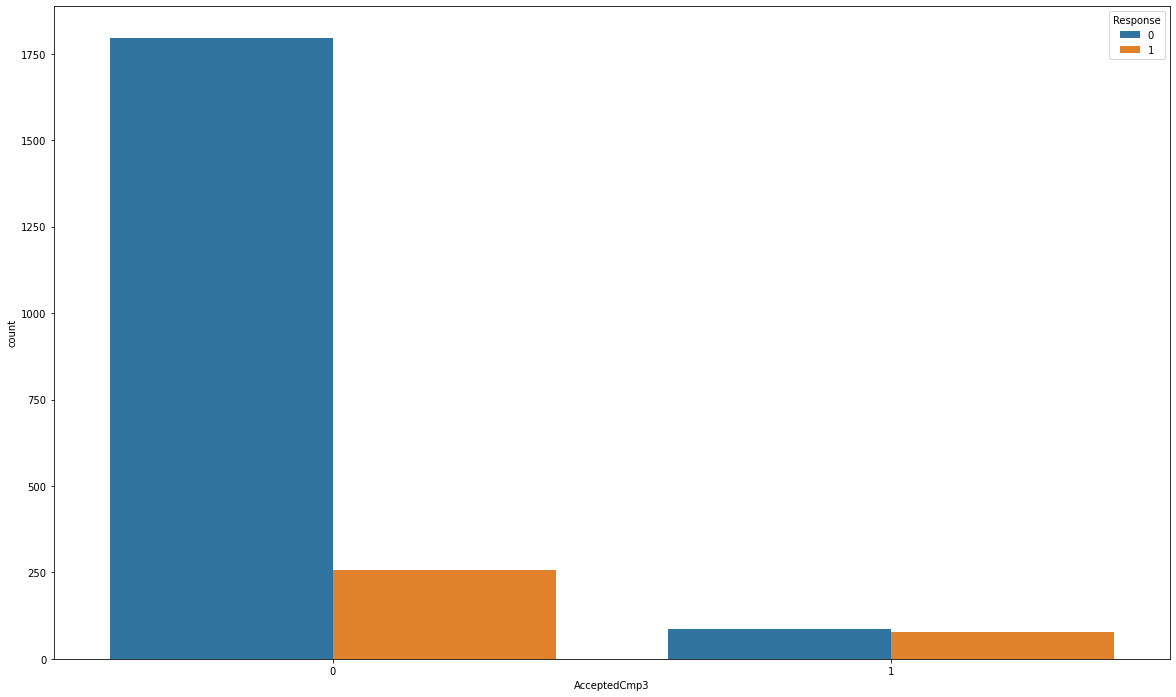

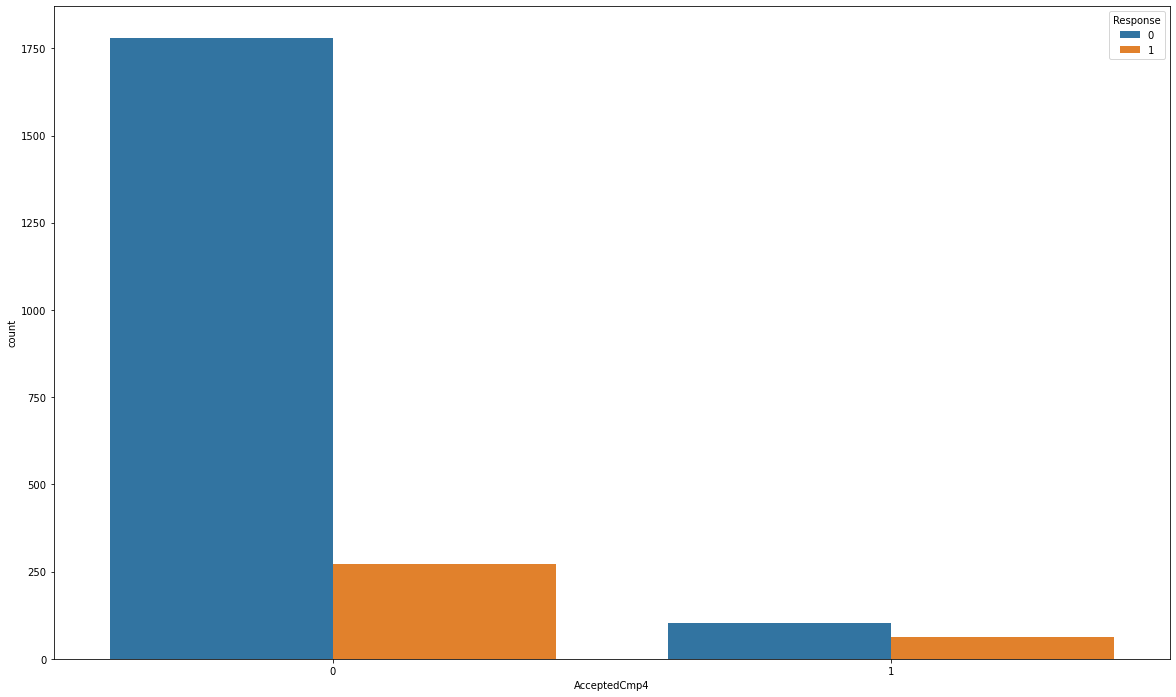

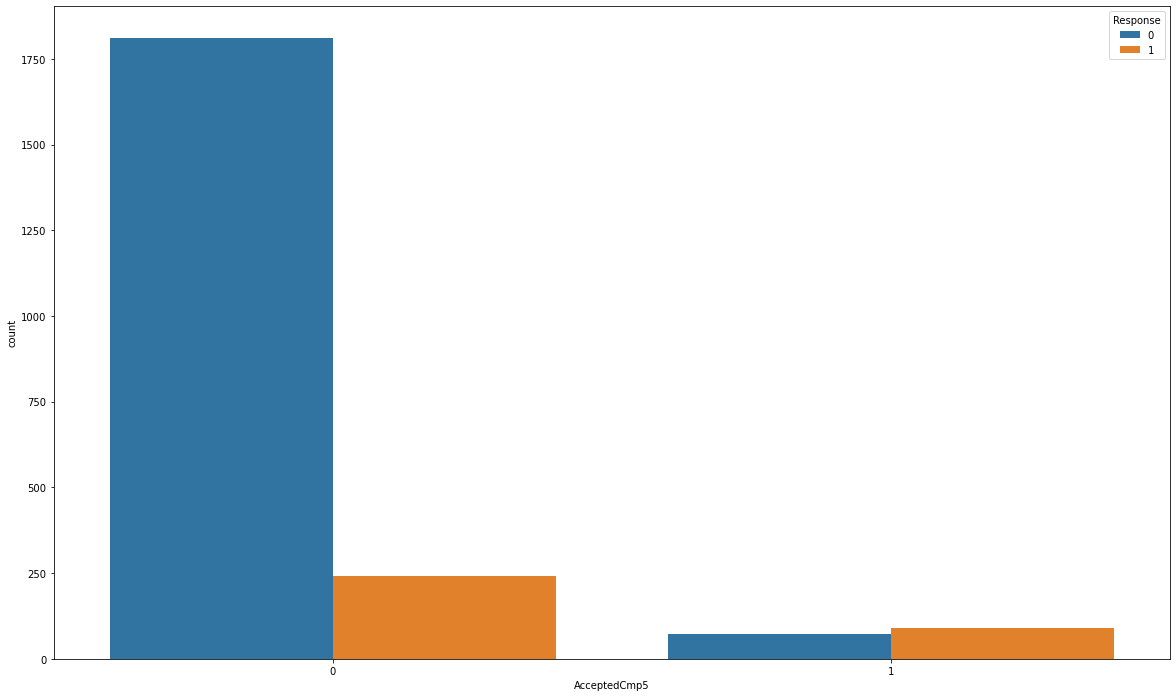

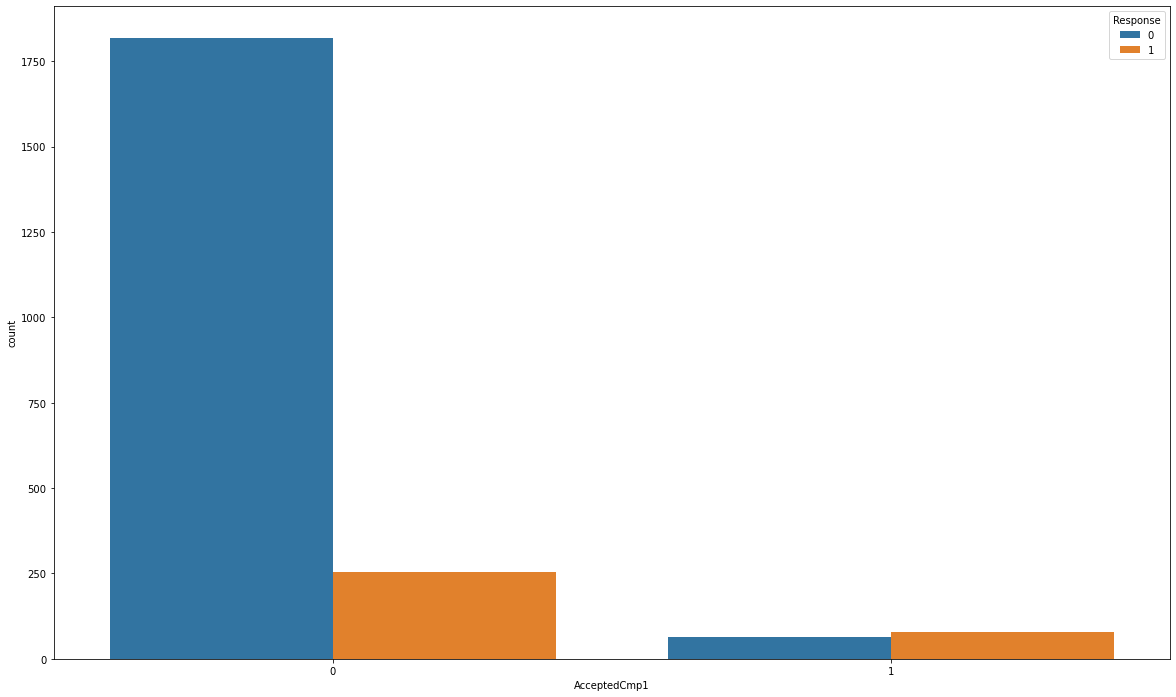

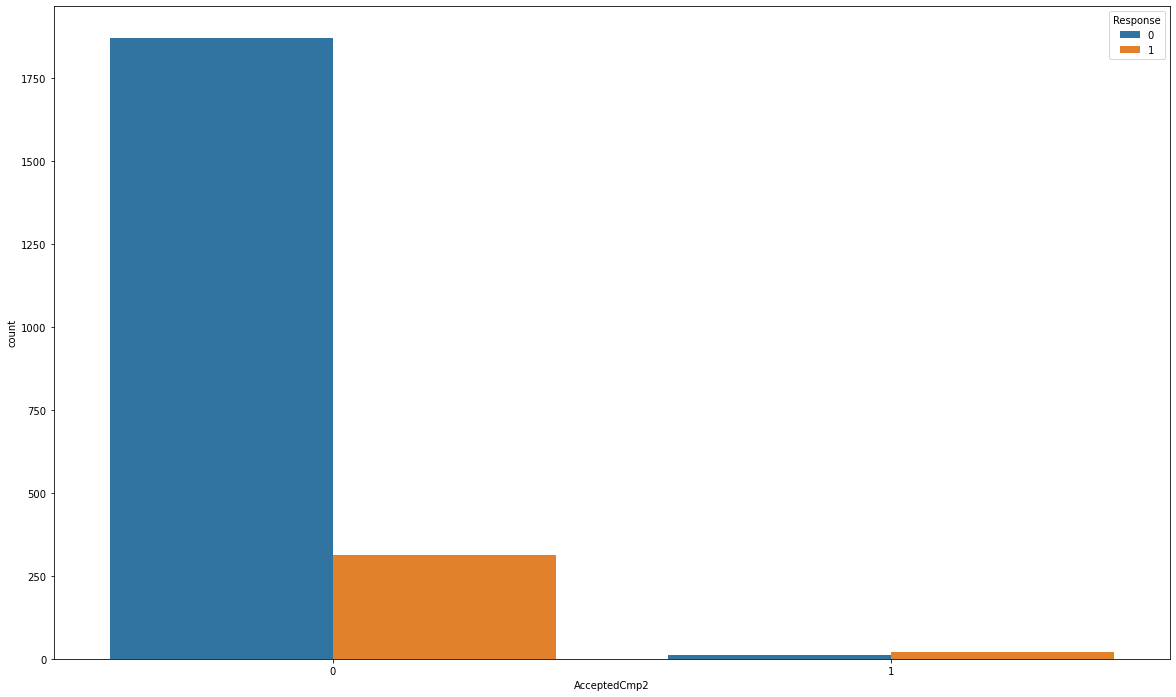

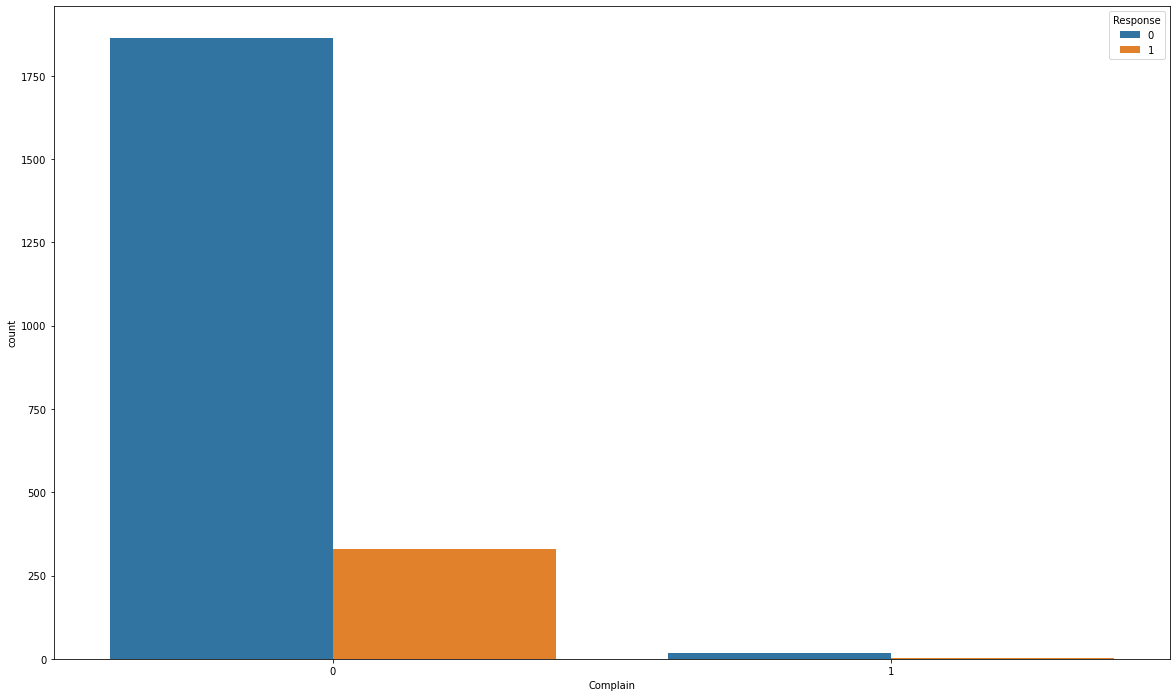

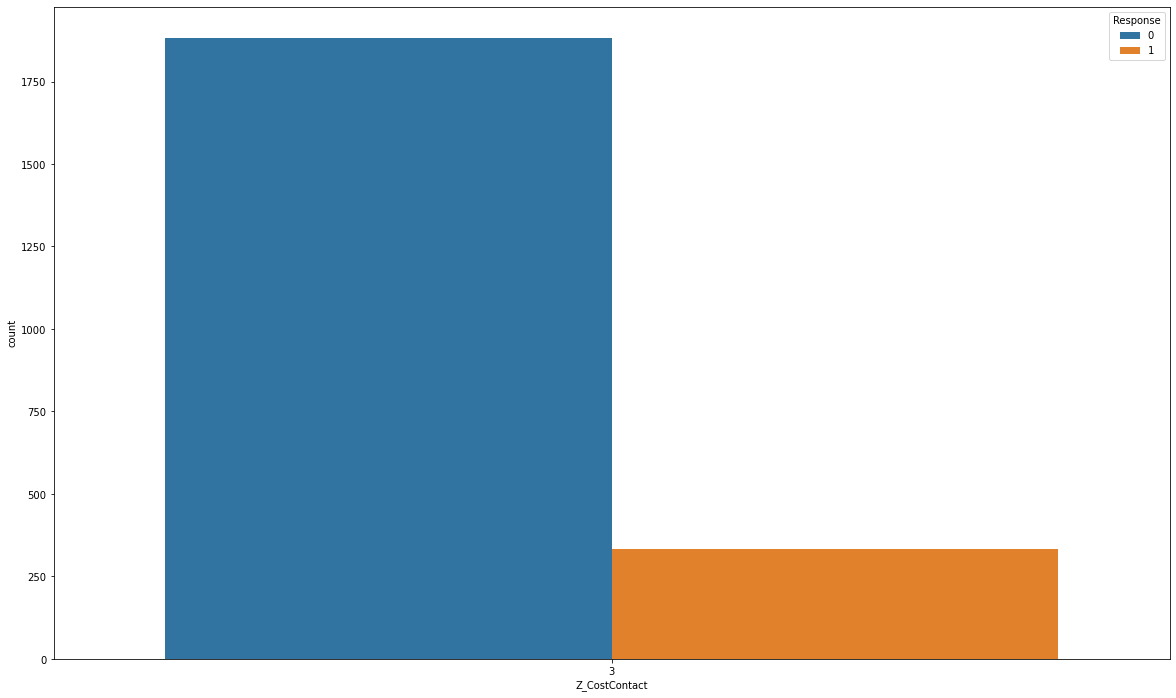

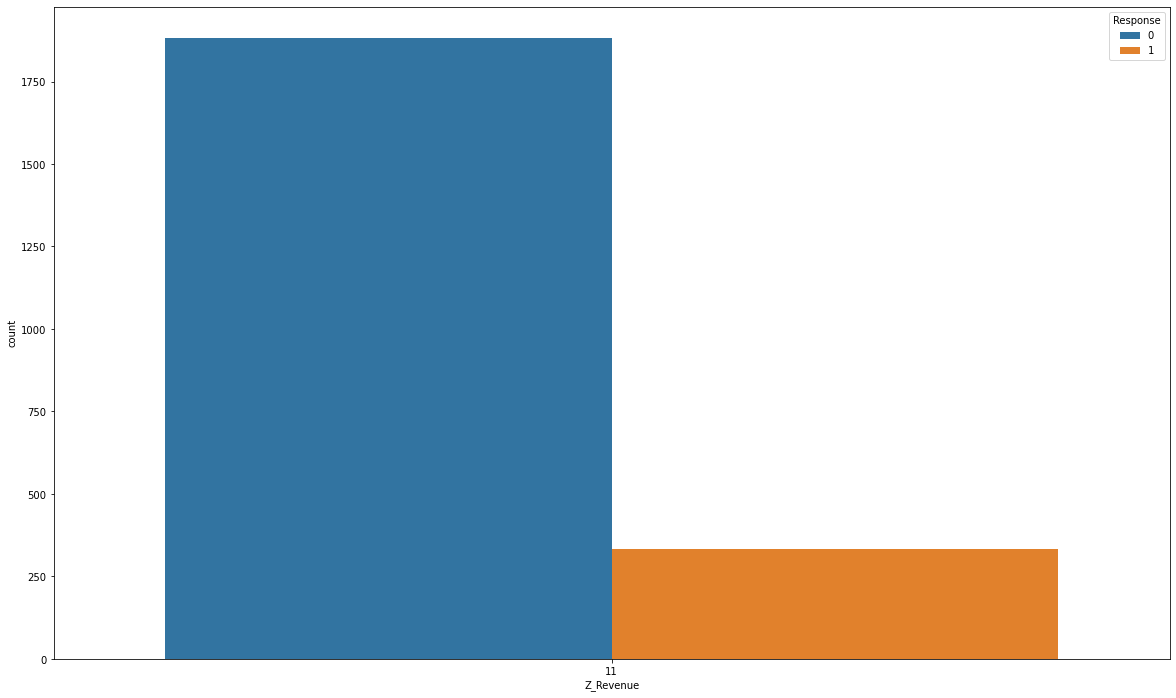

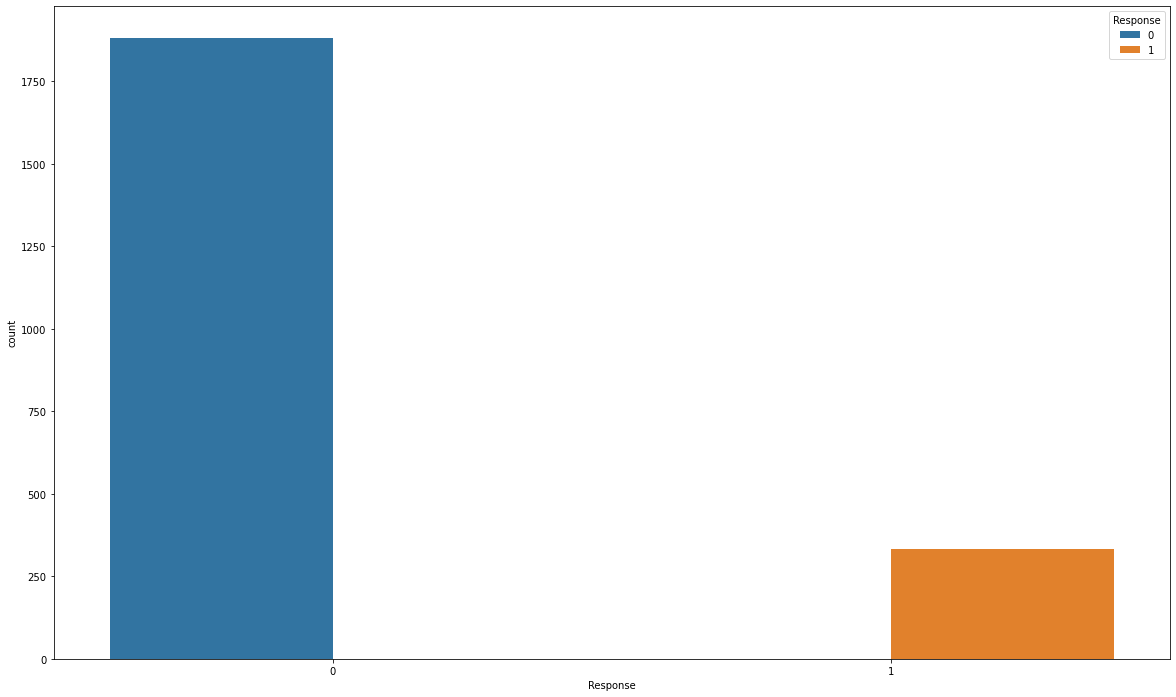

In [ ]:

for col_name in num:
  plt.figure(figsize=(20,12))
  sns.countplot(data=df, x=col_name, hue='Response')
  

In [ ]:
cat = df.select_dtypes(include='object')


In [ ]:
cat

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


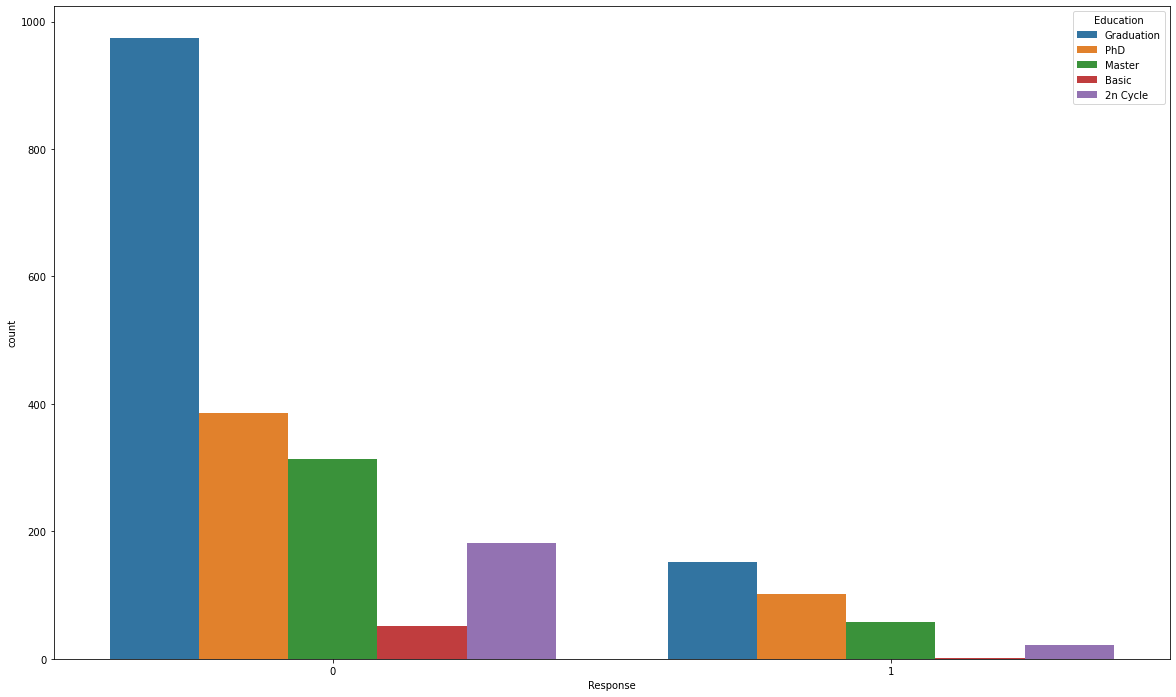

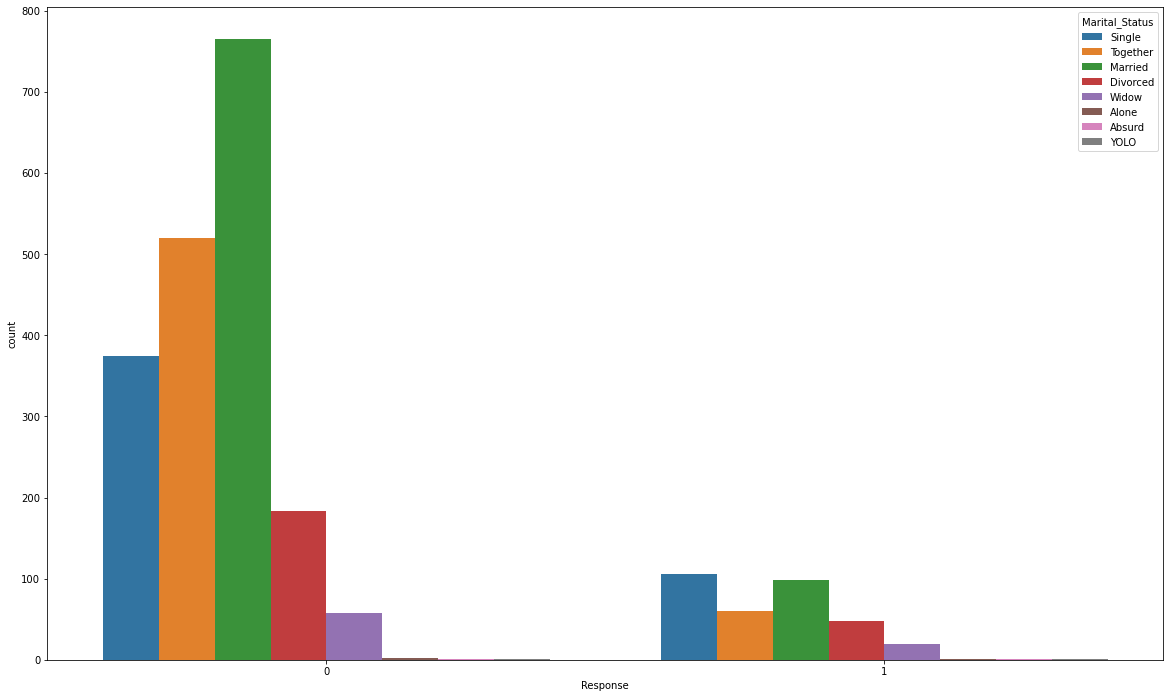

In [ ]:
for col_name in cat:
    plt.figure(figsize=(20,12))
    sns.countplot(
        data=df,
        x=df['Response'],
        hue=df[col_name]
    )

# berdasarkan hasil EDA di atas faktor faktor yang mempengaruhi seseorang untuk merespon suatu campaign yaitu 
## - kidhome, kemungkinan yang tidak punya anak di rumah tidak mersepon campaign karena tidak membutuhkan promo
## - teenhome, kemungkinan yang tidak punya anak dewasa di rumah tidak mersepon campaign karena tidak membutuhkan promo
## - recency, semakin keterkinian transaksi, semakin ia meresponse campaign
## - NumWebPurchase, semakin sedikit belanja lewat web customer tidak merespon campaign
## - NumDealsPurchases, semakin sedikit belanja lewat promo, customer tidak merespon campaign
## - NumCatalogPurchases, semakin sedikit belanja lewat catalog customer tidak merespon campaign
## - NumStorePurchases, semakn sedikit belanja langusng lewat toko customer tidak merespon campaign
## - AcceptedCmpX, kebanyakan pelanggan yang merespon pada campain x juga akan merespons campaign selanjutnya


# Modeling

In [ ]:
import numpy as np

In [ ]:
# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier

# load scikit-plot modules
import scikitplot as skplt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [ ]:
dummy_var_edu = pd.get_dummies(df['Education'], prefix='', prefix_sep='', dtype=np.int64)

In [ ]:
dummy_var = pd.get_dummies(df['Marital_Status'])[['Single', 'Divorced', 'Married']]

In [ ]:
dummy_var

,Single,Divorced,Married
0,1,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
2235,0,0,1
2236,0,0,0
2237,0,1,0
2238,0,0,0


In [ ]:
df2 = df[['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

In [ ]:
df3 = pd.concat([df2, dummy_var], axis=1)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Kidhome              2216 non-null   int64
 1   Teenhome             2216 non-null   int64
 2   Recency              2216 non-null   int64
 3   NumDealsPurchases    2216 non-null   int64
 4   NumWebPurchases      2216 non-null   int64
 5   NumCatalogPurchases  2216 non-null   int64
 6   NumStorePurchases    2216 non-null   int64
 7   NumWebVisitsMonth    2216 non-null   int64
 8   AcceptedCmp1         2216 non-null   int64
 9   AcceptedCmp2         2216 non-null   int64
 10  AcceptedCmp3         2216 non-null   int64
 11  AcceptedCmp4         2216 non-null   int64
 12  AcceptedCmp5         2216 non-null   int64
 13  Single               2216 non-null   uint8
 14  Divorced             2216 non-null   uint8
 15  Married              2216 non-null   uint8
dtypes: int64(13), uint8(3)
m

In [ ]:
#x = df.drop(['ID','Response', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact','Z_Revenue'], axis=1).values
#x = df[['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].values
x = df3.values
y = df['Response'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.285986
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1534
Method:                           MLE   Df Model:                           16
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.3241
Time:                        10:46:46   Log-Likelihood:                -443.56
converged:                       True   LL-Null:                       -656.23
Covariance Type:            nonrobust   LLR p-value:                 1.765e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5296      0.459     -5.508      0.000      -3.430      -1.629
x1            -0.1139      0.232     -0.492      0.623      -0.568       0.340
x2            -0.9598      0.208     -4.618      0.000      -1.367      -0.552
x3            -0.0285      0.003     -8.442      0.000      -0.035      -0.022
x4             0.1283      0.050      2.569      0.010       0.030       0.226
x5             0.1433      0.040      3.586      0.000       0.065       0.222
x6             0.1279      0.037      3.487      0.000       0.056       0.200
x7            -0.0904      0.036     -2.476      0.013      -0.162      -0.019
x8             0.1300      0.049      2.673      0.008       0.035       0.225
x9             1.1977      0.306      3.915      0.000       0.598       1.797
x10            1.0096      0.717      1.407      0.159      -0.396       2.416
x11            1.8558      0.260      7.141      0.000       1.346       2.365
x12            0.8640      0.299      2.885      0.004       0.277       1.451
x13            1.7509      0.301      5.808      0.000       1.160       2.342
x14            0.8781      0.240      3.666      0.000       0.409       1.348
x15            1.1038      0.287      3.847      0.000       0.541       1.666
x16           -0.2800      0.236     -1.188      0.235      -0.742       0.182
==============================================================================
"""

p_values bernilai di bawah 0.05, yang berarti variabel yang di pilih sudah bagus.
ada 2 kolom yang p_value nya di atas 0.05, yaitu kolom 1 dan 10

In [ ]:
x = df[['Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].values
y = df['Response'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [ ]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.299621
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1551
Model:                          Logit   Df Residuals:                     1539
Method:                           MLE   Df Model:                           11
Date:                Tue, 19 Apr 2022   Pseudo R-squ.:                  0.2918
Time:                        10:42:24   Log-Likelihood:                -464.71
converged:                       True   LL-Null:                       -656.23
Covariance Type:            nonrobust   LLR p-value:                 2.438e-75
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3761      0.383     -6.205      0.000      -3.127      -1.626
x1            -0.9006      0.197     -4.560      0.000      -1.288      -0.513
x2            -0.0267      0.003     -8.206      0.000      -0.033      -0.020
x3             0.1036      0.046      2.263      0.024       0.014       0.193
x4             0.1409      0.037      3.851      0.000       0.069       0.213
x5             0.1380      0.035      3.945      0.000       0.069       0.207
x6            -0.0879      0.035     -2.545      0.011      -0.156      -0.020
x7             0.1336      0.046      2.875      0.004       0.043       0.225
x8             1.1804      0.290      4.066      0.000       0.611       1.749
x9             1.8546      0.252      7.358      0.000       1.361       2.349
x10            0.9562      0.283      3.376      0.001       0.401       1.511
x11            1.6091      0.289      5.572      0.000       1.043       2.175
==============================================================================
"""

saat ini p_value sudah bagus

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

C:\Users\Aditya Rizaldi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

In [ ]:
# check model coefficient
logistic_reg.coef_

array([[-0.1709981 , -0.97769161, -0.02802601,  0.11838713,  0.14305604,
         0.10251517, -0.09392551,  0.10234118,  1.19758965,  0.62420154,
         1.83487191,  0.87735532,  1.6152927 ,  0.70392227,  0.8988068 ,
        -0.31266295]])

In [ ]:
# check the intercept
logistic_reg.intercept_

array([-2.11694748])

## Model Evaluation

In [ ]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Resopnse'], output_dict=True))

,not Response,Resopnse,accuracy,macro avg,weighted avg
precision,0.891057,0.66,0.873684,0.775528,0.856312
recall,0.969912,0.33,0.873684,0.649956,0.873684
f1-score,0.928814,0.44,0.873684,0.684407,0.855308
support,565.000000,100.00,0.873684,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

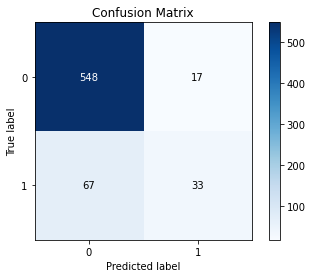

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


In [ ]:
var_name = df3.columns.to_list()

<AxesSubplot:ylabel='feature'>

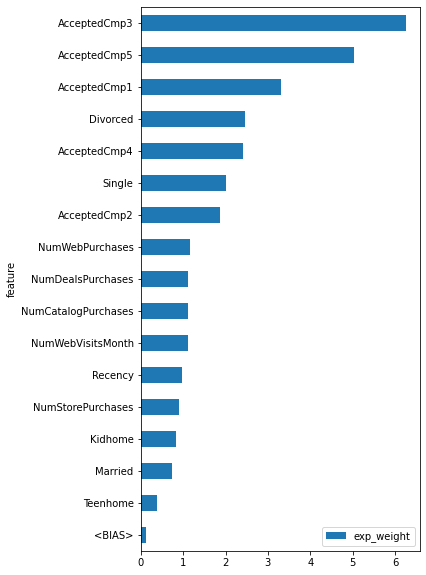

In [ ]:
# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
)

## Model Improvement

In [ ]:
parameter = {'fit_intercept': [True, False],
 'C': np.array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

model = GridSearchCV(logistic_reg, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\Aditya Rizaldi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'fit_intercept': [True, False]},
             verbose=1)

In [ ]:
model.best_params_

{'C': 10.0, 'fit_intercept': True}

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8878143133462283, 0.8736842105263158)

In [ ]:
# prediction
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

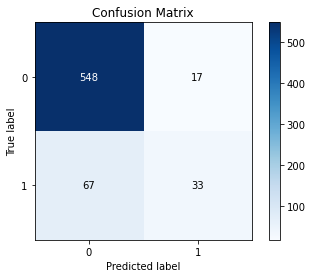

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


In [ ]:
# redefine logistic regression model with best params
logistic_reg = LogisticRegression(random_state=1000, C=10.0, fit_intercept=True)
# fit model to data
logistic_reg.fit(X_train, y_train)

C:\Users\Aditya Rizaldi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0, random_state=1000)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8878143133462283, 0.8736842105263158)

<AxesSubplot:ylabel='feature'>

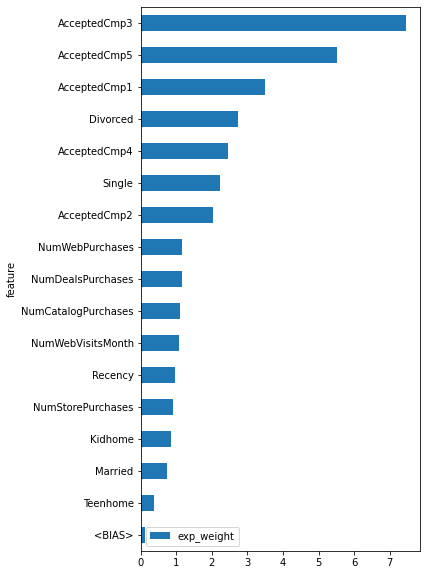

In [ ]:
# plt.rcParams["figure.figsize"] = (5,10)
eli5.explain_weights_df(
    logistic_reg, feature_names= var_name
).assign(
    # create new weight called exp_weight
    exp_weight = lambda x: x['weight'].map(lambda x: np.exp(x))
).sort_values(
    by = "exp_weight"
).plot(
    x = 'feature',
    y = 'exp_weight',
    kind = 'barh',
    figsize = (5,10)
)

## Model Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# prediction
pred_result = knn.predict(X_test)
pred_proba_result = knn.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.864139,0.437500,0.843609,0.650820,0.799983
recall,0.968142,0.140000,0.843609,0.554071,0.843609
f1-score,0.913189,0.212121,0.843609,0.562655,0.807765
support,565.000000,100.000000,0.843609,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.843609022556391

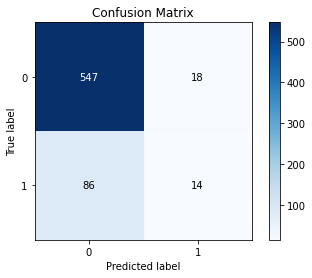

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


## Model Improvement

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
parameter = {
    "n_neighbors" : range(1, 51, 2),
    "weights" : ['uniform', 'distance'],
    "p" : [1,2]
}

model = GridSearchCV(knn, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
model.best_params_

{'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9922630560928434, 0.8676691729323308)

In [ ]:
# prediction
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8676691729323308

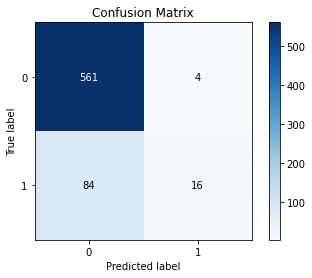

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


## Model Evaluation

In [ ]:
# define regression tree model
tree_clf = DecisionTreeClassifier(random_state = 1000, max_depth = 5)
# fit model to data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1000)

In [ ]:
# prediction
pred_result = tree_clf.predict(X_test)
pred_proba_result = tree_clf.predict_proba(X_test)

In [ ]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.890675,0.744186,0.881203,0.817431,0.868647
recall,0.980531,0.320000,0.881203,0.650265,0.881203
f1-score,0.933446,0.447552,0.881203,0.690499,0.860379
support,565.000000,100.000000,0.881203,665.000000,665.000000


In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.881203007518797

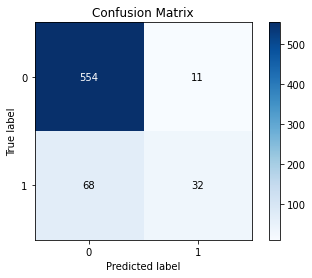

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


## Model Improvement

In [ ]:
tree_clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [ ]:
parameter = {
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 }

model = GridSearchCV(tree_clf, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 198 candidates, totalling 594 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=1000),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [ ]:
model.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9187620889748549, 0.8676691729323308)

In [ ]:
# prediction
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

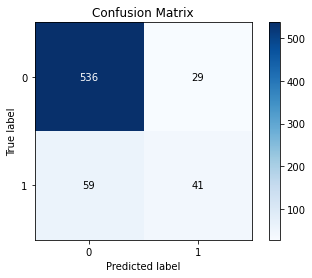

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


In [ ]:
# redefine regression tree model with best param
tree_clf = DecisionTreeClassifier(
    random_state = 1000, 
    max_depth=10,
    max_features='auto',
    min_samples_leaf = 1,
    min_samples_split = 10
    )
# fit model to data
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                       random_state=1000)

In [ ]:
# prediction
pred_result = model.predict(X_test)
pred_proba_result = model.predict_proba(X_test)

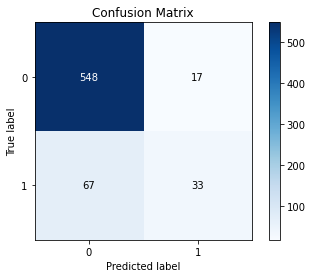

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


In [ ]:
eli5.sklearn.explain_decision_tree(tree_clf, feature_names=var_name)

Weight,Feature
0.1654,Recency
0.1332,AcceptedCmp5
0.1233,AcceptedCmp3
0.1227,NumCatalogPurchases
0.1118,NumWebVisitsMonth
0.0735,NumWebPurchases
0.0617,NumDealsPurchases
0.0487,NumStorePurchases
0.0474,AcceptedCmp4
0.0423,Teenhome


In [ ]:
tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test)

(0.9187620889748549, 0.8676691729323308)

In [ ]:
print(export_text(tree_clf, feature_names = var_name))

|--- AcceptedCmp3 <= 0.50
|   |--- Recency <= 17.50
|   |   |--- NumWebVisitsMonth <= 8.50
|   |   |   |--- AcceptedCmp5 <= 0.50
|   |   |   |   |--- AcceptedCmp1 <= 0.50
|   |   |   |   |   |--- NumWebPurchases <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- NumWebPurchases >  1.50
|   |   |   |   |   |   |--- NumWebVisitsMonth <= 7.50
|   |   |   |   |   |   |   |--- NumDealsPurchases <= 8.00
|   |   |   |   |   |   |   |   |--- NumCatalogPurchases <= 4.50
|   |   |   |   |   |   |   |   |   |--- Recency <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Recency >  3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- NumCatalogPurchases >  4.50
|   |   |   |   |   |   |   |   |   |--- NumCatalogPurchases <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- NumCatalogPurchases >  8.50
|   |   |   |   |   |   |   |   |  

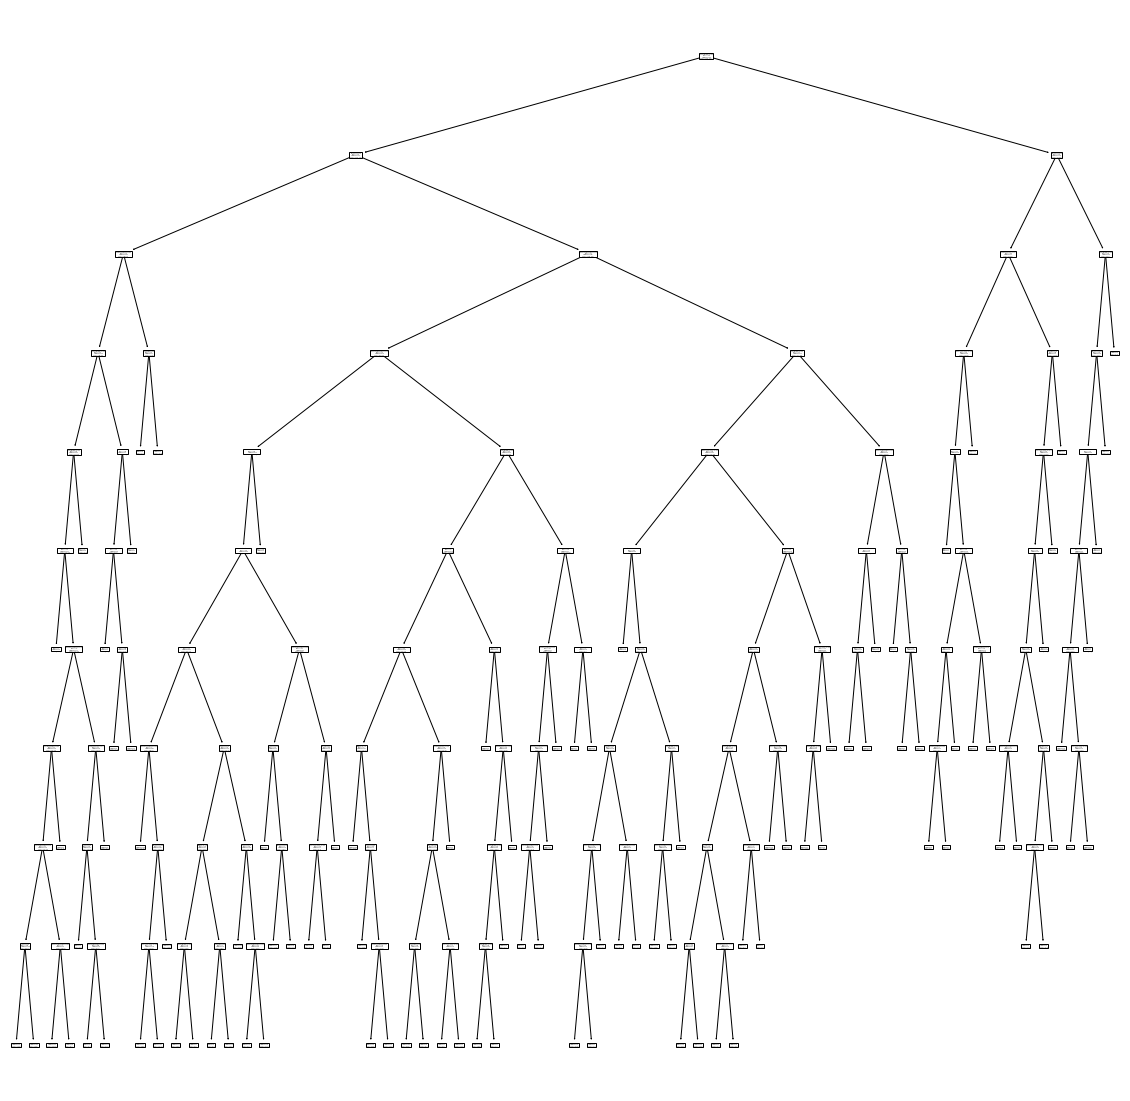

In [ ]:
plt.figure(figsize=(20, 20))
plot_tree(tree_clf, feature_names = var_name)
plt.show()

In [ ]:
# define RuleFit model
rulefit_clf = SkopeRules(
    n_estimators = 10,
    random_state = 1000,
    max_features = 'sqrt',
    feature_names = var_name
)

# fit model to data
rulefit_clf.fit(X_train, y_train)

SkopeRules(feature_names=['Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
                          'NumWebPurchases', 'NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth',
                          'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                          'AcceptedCmp4', 'AcceptedCmp5', 'Single', 'Divorced',
                          'Married'],
           max_features='sqrt', random_state=1000)

In [ ]:
# prediction
pred_result = rulefit_clf.predict(X_test)

In [ ]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8285714285714286

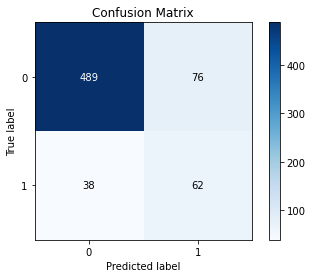

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);


# Rekomendasi

berdasarkan socre akurasi yang paling bagus, kami memberikan rekomendasi model Decision Tree, dengan score 0.8676691729323308
dengan top 5 feature wieght teratas dari model terbaik yang kita miliki
- 0.1654	Recency
- 0.1332	AcceptedCmp5
- 0.1233	AcceptedCmp3
tiga di atas, semakin baru transaksi, dan response sebelumnya pada campaign, maka akan menentukan apakah customer akan merspons campaign terbaru?

- 0.1227	NumCatalogPurchases, customer yang beli melalui catalog bisa jadi meresponse campaign, karna di catalog di sisipkan promo campaign 
- 0.1118	NumWebVisitsMonth, customer yang selalu mengunjungi web, bisa jadi merespon campaign

